# Review

<font color='grey'><b>Hey there Anton! My name is Maxim, and I will be reviewing your project. I've put all my comments into markdown cells with different background colors.</b></font>

<div class="alert alert-success" role="alert">
  If you did something great I'll be using green color for my comment.
</div>

<div class="alert alert-warning" role="alert">
Yellow cell means it is an optional recommendation -- like when I think something can be improved, or simply offer an advice for your future work.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work before I can accept it then the color will be red
</div>

<div class="alert alert-info" role="alert">
  If you'd want to leave your own comment or ask a question or anything: use this cell style, so it would be easier for me to notice in the text  and adress it ;)
</div>

<font color='grey'><b>I left my overall impressions and conclusions at the end of this cell.</b></font>

<font color='grey'><b>And, please! Do not delete my comments in further iterations of your project (if there would be any).</b></font>


<div class="alert alert-success" role="alert">
<h4><b>Summary</b></h4>
    
Exceptional presentation skills, decent code, correct calculations and an extremely thorough analysis with lots of additional research, as well as solid conclusions.
    
<br>
And I was really impressed by that forecast analysis you did in the end -- that's a top notch work =)

<br> 
I left just a couple of yellow notes regarding the conclusions and graphs -- but other that that I think this is one of the strongest projects I've seen on this sprint. Excellent job!

<br>
With that said, I'm accepting it and wish you the best of luck in your future studies! =)

<br>
<br>
Cheers!


</div>


### Internship in the analytical department of Yandex.Afisha.

<div class="alert alert-success" role="alert">
Excellent idea to add TOC! I like it =)
</div>

##### Table of contents

0. [Introduction](#introduction)<br />
1. [Step 1. Download the data and prepare it for analysis](#step_1)<br />
1.1 [Loading data in an optimized form](#loading_data)<br />
1.2 [Data preprocessing](#data_preprocessing)<br />
2. [Step 2.  Make reports and calculate metrics](#step_2)<br />
2.1 [Product](#product)<br />
2.1.1 [How many people use our service every day, week, and month?](#dau)<br />
2.1.1.1 [Sticky factor](#sticky_factor)<br />
2.1.1.2 [Graph 1. Sticky factor  (DAU/MAU and DAU)](#sticky_factor2)<br />
2.1.1.3 [Graph 2. Sticky factor  (DAU/MAU and MAU)](#sticky_factor3)<br />
2.1.2 [The number of sessions per day.](#session)<br />
2.1.2.1 [Comparison of the dynamics of the total number of sessions per day with the dynamics of DAU.](#session2)<br />
2.1.2.2 [The average number of sessions per user.](#session3)<br />
2.1.2.3 [Distribution of sessions by device type.](#session4)<br />
2.1.3 [The duration of each session.](#duration)<br />
2.1.3.1 [Dynamics of changes in the length of the session.](#duration1)<br />
2.1.4 [How often do users come back?](#come_back)<br />
2.2 [Sales](#sales)<br />
2.2.1 [How long does it take between the first visit and the first purchase?](#conversion)<br />
2.2.1.1 [Average conversion](#conversion1)<br />
2.2.1.2 [Distribution of conversions by source](#conversion2)<br />
2.2.1.3 [Distribution of conversions by term](#conversion3)<br />
2.2.1.4 [Distribution of conversion by devices](#conversion4)<br />
2.2.2. [The number of orders for each time period.](#orders)<br />
2.2.2.1 [Daily distribution of orders by source.](#orders1)<br />
2.2.2.2 [Weekly distribution of orders by source.](#orders2)<br />
2.2.2.3 [Distribution of the number of orders by cohorts](#orders3)<br />
2.2.3 [The average purchase size.](#avg_orders)<br />
2.2.3.1 [The average size of percause by days.](#avg_orders1)<br />
2.2.3.2 [The average size of purchase by source](#avg_orders2)<br />
2.2.3.3 [The average size of purchase by cohort](#avg_orders3)<br />
2.2.4 [How much profit does one client bring?](#profit)<br />
2.2.4.1 [Average profit per client.](#profit1)<br />
2.2.4.2 [Average profit per client by source.](#profit2)<br />
2.2.4.3 [Average profit per client by cohort](#profit3)<br />
2.3 [Marketing](#marketing)<br />
2.3.1 [How much money was spent?](#costs)<br />
2.3.1.1 [Daily costs.](#costs1)<br />
2.3.1.2 [How much was spent on each source?](#costs2)<br />
2.3.2 [The cost of attracting customers.](#cac)<br />
2.3.2.1  [The cost of attracting customers by source.](#cac1)<br />
2.3.2.2  [The cost of attracting customers by cohort.](#cac2)<br />
2.3.3 [Assessment of return on investment in customer acquisition. (ROI)](#romi)<br />
2.3.3.1 [ROMI by cohort](#romi1)<br />
2.3.3.2 [ROMI by source](#romi2)<br />
2.3.3.3 [Forecast](#forecast)<br />
3. [Step 3. Overall conclusion](#overall_conclusion)





Introduction<br /><a name="introduction"></a>
Task:<br />

I am doing an internship in the analytical department of Yandex.Afisha. My first task is to help optimize marketing costs.<br /><br />
I have:<br />
- Server logs with data about Yandex.Afisha visits from June 2017 to May 2018.<br />
- Dump file with all orders for the period.<br />
- Marketing expenses statistics.<br />

I plan to find out:<br />
- How people use the product.<br />
- How long does it take from the moment the client visits the site to the first purchase.<br />
- How much money each customer brings.<br />
- The effectiveness of sources of customer acquisition.<br />

<br />
In the end, I will draw conclusions and prepare proposals for the marketing department.

#### Step 1. Download the data and prepare it for analysis.<a name="step_1"></a>

In [1]:
import pandas   as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

##### Preliminary analysis of the data structure.

In [2]:
visits_path   = 'visits_log_us.csv'
orders_path   = 'orders_log_us.csv'
costs_path    = 'costs_us.csv'
platform_path = 'https://code.s3.yandex.net/datasets/'

try:
    visits   = pd.read_csv(visits_path, nrows=500)
    orders   = pd.read_csv(orders_path, nrows=500)
    costs    = pd.read_csv(costs_path, nrows=500)
except:
    visits  = pd.read_csv(platform_path+visits_path, nrows=500)
    orders  = pd.read_csv(platform_path+orders_path, nrows=500)
    costs   = pd.read_csv(platform_path+costs_path, nrows=500)

In [3]:
print('Visits: \n')
print(visits.info())

Visits: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 19.7+ KB
None


In [4]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

We need to convert the "Device" field to the category type, and the "Start Ts" and "End Ts" fields to the DateTime type.

In [5]:
print('Orders: \n')
print(orders.info())

Orders: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 11.8+ KB
None


We need to convert the "Buy Ts" field to the DateTime type.

In [6]:
print('Сosts: \n')
print(costs.info())

Сosts: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB
None


We need to convert the "dt" field to the DateTime type.

##### 1.1 Loading data in an optimized form.<a name="loading_data"></a>

In [7]:
try:
    visits   = pd.read_csv(visits_path,  
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])
    orders   = pd.read_csv(orders_path,
                  parse_dates=['Buy Ts'])
    costs    = pd.read_csv(costs_path,
                  parse_dates=['dt'])
except:
    visits  = pd.read_csv(platform_path+visits_path,  
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])
    orders  = pd.read_csv(platform_path+orders_path,
                  parse_dates=['Buy Ts'])
    costs   = pd.read_csv(platform_path+costs_path,
                  parse_dates=['dt'])   

#### 1.2. Data preprocessing<a name="data_preprocessing"></a>

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [9]:
print('Duplicates found - ',visits.duplicated().sum(),' records')
visits[:5]

Duplicates found -  0  records


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
print('Duplicates found - ',orders.duplicated().sum(),' records')
orders[:5]

Duplicates found -  0  records


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [13]:
print('Duplicates found - ',costs.duplicated().sum(),' records')
costs[:5]

Duplicates found -  0  records


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


**Conclusion:**<br />
No missing data were found.<br />
No duplicates were found.<br />
There is no need to convert the data type.<br />
For convenience, we need to rename the columns. We will remove spaces and make all letters small.

In [14]:
visits = visits.rename(columns = {'End Ts':'End_Ts','Source Id':'Source_Id','Start Ts':'Start_Ts'})
orders = orders.rename(columns= {'Buy Ts':'Buy_Ts'})
visits = visits.rename(str.lower, axis='columns')
orders = orders.rename(str.lower, axis='columns')

<div class="alert alert-success" role="alert">
Solid initial analysis and conclusions! =)
</div>

### Step 2.  Make reports and calculate metrics<a name="step_2"></a>

#### 2.1 Product<a name="product"></a>

##### 2.1.1 How many people use our service every day, week, and month?<a name="dau"></a>

In [15]:
visits['day']    = visits['start_ts'].dt.day
visits['week']   = visits['start_ts'].dt.isocalendar().week
visits['month']  = visits['start_ts'].dt.month
visits['year']   = visits['start_ts'].dt.year

dau = visits.groupby(['day','month','year']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['week','year']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['month','year']).agg({'uid':'nunique'}).mean()

print('{:} people use the app every day.'.format(int(dau)))
print('{:} people use the app every week.'.format(int(wau)))
print('{:} people use the app every month.'.format(int(mau)))

907 people use the app every day.
5716 people use the app every week.
23228 people use the app every month.


<div class="alert alert-success" role="alert">
The numbers are correct =)
</div>

Let's build graphs:

In [16]:
# Let's prepare the data for building the graph "Number of users per day"
#DAU
dau_graph = visits.groupby(['year','month','day']).agg({'uid':'nunique'})
dau_graph = dau_graph.reset_index()

dau_graph['day'] = dau_graph['day'].astype('string')
dau_graph['month'] = dau_graph['month'].astype('string')
dau_graph['year'] = dau_graph['year'].astype('string')

dau_graph['xticks'] = dau_graph['month'] + '.' + dau_graph['year']

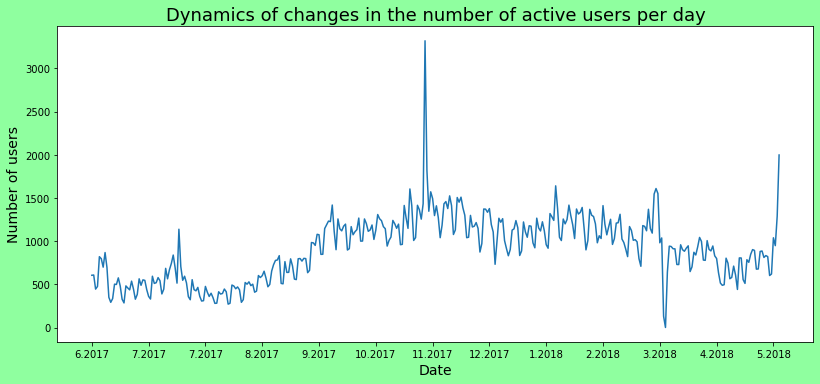

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph['uid'])
x_pos = np.arange(len(dau_graph['uid']))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of users', fontsize=14)
ax.set_title('Dynamics of changes in the number of active users per day', fontsize=18)
fig.patch.set_facecolor('xkcd:mint green')
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)

plt.show()

Conclusion:<br />
We clearly see weekly fluctuations on the graph, which means that the number of users on different days of the week is not the same. As we can see, the number of unique users has been growing since July 2017, but in November it stops and a gradual decline begins.

<div class="alert alert-success" role="alert">
Excellent illustration! And I really the touch with custom background =) 
</div>

In [18]:
#MAU
mau_graph = visits.groupby(['year','month']).agg({'uid':'nunique'})
mau_graph = mau_graph.reset_index()

mau_graph['month'] = mau_graph['month'].astype('string')
mau_graph['year'] = mau_graph['year'].astype('string')

mau_graph['xticks'] = mau_graph['month'] + '.' + mau_graph['year']

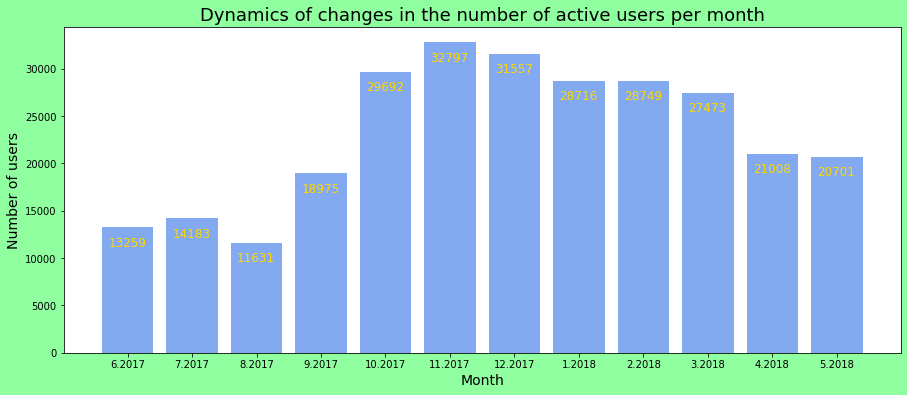

In [19]:
# Let's build a graph:

n = len(mau_graph['xticks'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, mau_graph['uid'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of users', fontsize=14)
plt.title('Dynamics of changes in the number of active users per month', fontsize=18)
plt.xticks(ind, mau_graph['xticks'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.1, 
            i.get_height()-2000, 
            int(mau_graph['uid'][idx]), 
            fontsize=12,color='gold')
plt.show()

Conclusion:<br /> As the graph shows, the number of users increases in winter. The minimum number of users is observed in August. From August to November, the number of users triples.

##### 2.1.1.1 Sticky factor<a name="sticky_factor"></a>

In [20]:
sticky_factor_w = dau/wau*100
sticky_factor_m = dau/mau*100
print('DAU/WAU is {:.2f}.'.format(sticky_factor_w[0]))
print('DAU/MAU is {:.2f}.'.format(sticky_factor_m[0]))

DAU/WAU is 15.88.
DAU/MAU is 3.91.


Sticky factors themselves are not very informative.<br />
Let's build graphs for analysis.

<div class="alert alert-success" role="alert">
Perfect!
</div>

##### 2.1.1.2 Graph 1. Sticky factor  (DAU/MAU and DAU)<a name="sticky_factor2"></a>

In [21]:
visits['date'] = visits['start_ts'].dt.floor('1D')
min_date = visits['date'].min() # date of first visit

dau_all_term = visits.groupby(['date']).agg({'uid':'nunique'})
dau_all_term = dau_all_term.reset_index()

In [22]:
def fill_sticky_factor(item):
    # skip the first 30 days so that we can calculate the data for the first month
    if int( (item-min_date) /np.timedelta64(1, 'D') ) > 29:
        dau_day_x = dau_all_term[dau_all_term['date'] == item]['uid'].min()
        maintime = item - pd.Timedelta(days=30)
        mau_day_x = visits.query('date <= @item and date > @maintime')['uid'].nunique()
        return dau_day_x / mau_day_x *100
    else:
        return 0

dau_all_term['sticky_factor'] = (
    dau_all_term['date'].apply(fill_sticky_factor)
)

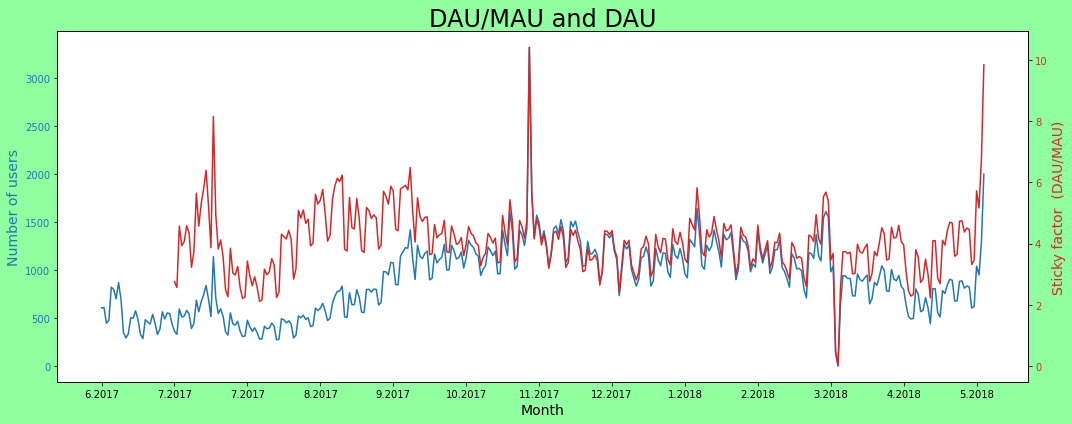

In [23]:
# graph 1. Sticky factor  (DAU/MAU and DAU)
fig, ax1 = plt.subplots(figsize=(15, 6))
color_ax1 = 'tab:blue'
plt.plot(dau_graph['uid'],color = color_ax1)

x_pos = np.arange(len(dau_graph['uid']))
fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of users', fontsize=14, color=color_ax1)
plt.tick_params(axis='y', labelcolor=color_ax1)
plt.title('DAU/MAU and DAU', fontsize=24)
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax1.xaxis.set_major_locator(loc)

#plot graph 2.  Sticky factor 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_ax2 = 'tab:red'
ax2.set_ylabel('Sticky factor  (DAU/MAU)',
               color=color_ax2,
               fontsize=14)  # we already handled the x-label with ax1
ax2.plot(dau_all_term.query('sticky_factor > 0')['sticky_factor'], 
         color = color_ax2)
ax2.tick_params(axis='y', labelcolor = color_ax2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Conclusion: <br />
As we can see, from August 2017 our charts began to converge, which means that users began to use our service less often. Since October, the charts have had the same dynamics, which means that the decline in interest in our service has stopped. In March 2018, sticky factor began to grow more sharply than DAU, which means that users began to use our service more often, which is good news.

<div class="alert alert-success" role="alert">
Very interesting insight and cool illustration! =)
</div>

##### 2.1.1.3 Graph 2. Sticky factor  (DAU/MAU and MAU)<a name="sticky_factor3"></a>

In [24]:
dau_all_term['month']  = dau_all_term['date'].dt.month
dau_all_term['year']   = dau_all_term['date'].dt.year
dau_all_term['month']  = dau_all_term['month'].astype('string')
dau_all_term['year']   = dau_all_term['year'].astype('string')

dau_all_term['xticks'] = dau_all_term['month'] + '.' + dau_all_term['year']
dau_month = dau_all_term.groupby('xticks').agg({'sticky_factor':'mean'})
dau_month = dau_month.reset_index()
mau_graph = mau_graph.merge(dau_month, on = 'xticks')
pattern = mau_graph 

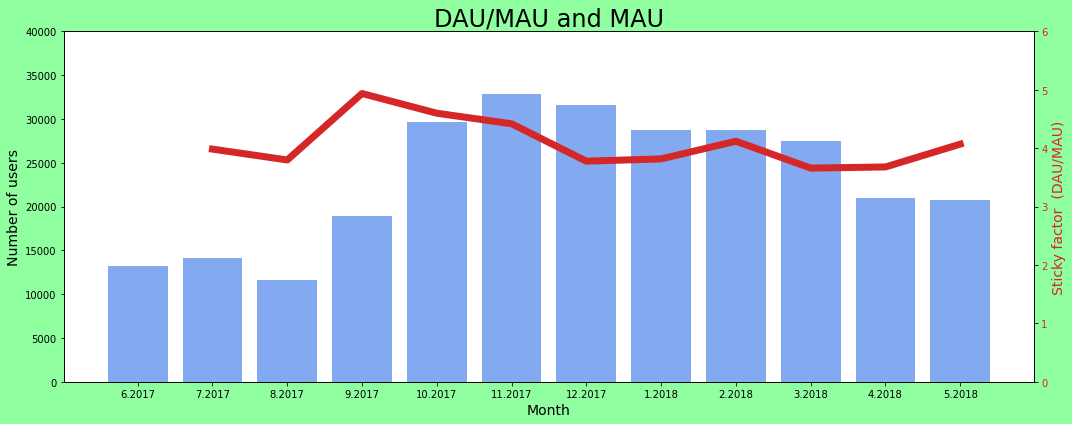

In [25]:
# Let's build a graph:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)
n = len(mau_graph['xticks'])
ind = np.arange(n) 

fig, ax1 = plt.subplots(figsize=(15, 6))
plt.bar(ind, mau_graph['uid'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of users', fontsize=14)
plt.title('DAU/MAU and MAU', fontsize=24)
plt.xticks(ind, mau_graph['xticks'])
ax1.set_ylim([0, 40000])

  
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Sticky factor  (DAU/MAU)', color=color, fontsize=14)  # we already handled the x-label with ax1
ax2.plot(mau_graph.query('sticky_factor > 0')['sticky_factor'], color=color, linewidth=7.0)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 6])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Conclusion:<br />
The graph shows that the sticky factor for the first 4 months had the same dynamics as MAU. However, then it began to decline, while the MAU was quite stable from 10.2017 to 3.2018. This means that the number of unique users per month was stable, and the number of unique users per day began to decrease, which means that users began to use our service less often. However, in January 2018, the decline stopped and we see that the sticky factor has begun to grow, which indicates that users have begun to use our service more often.

<div class="alert alert-warning" role="alert">
Very cool! Though, when you plot something with multiple lines/colors, I would strongly advise to either add a legend of sorts or at least to elaborate in the comments what each line means.
</div>

##### 2.1.2 The number of sessions per day.<a name="session"></a>

In [26]:
sessions_per_day   = visits.groupby(['year','month','day']).agg({'uid':'count'})
sessions_per_day   = sessions_per_day.rename(columns = {'uid':'count_sessions'})
print('Average number of sessions per day - {:}'.format(int(sessions_per_day.mean())))

Average number of sessions per day - 987


##### 2.1.2.1 Comparison of the dynamics of the total number of sessions per day with the dynamics of DAU.<a name="session2"></a>

In [27]:
sessions_per_day = sessions_per_day.reset_index().reset_index()
dau_graph = dau_graph.reset_index()

In [28]:
dau_graph = dau_graph.merge(sessions_per_day, on = 'index')
dau_graph = dau_graph[['index','xticks','uid','count_sessions']]

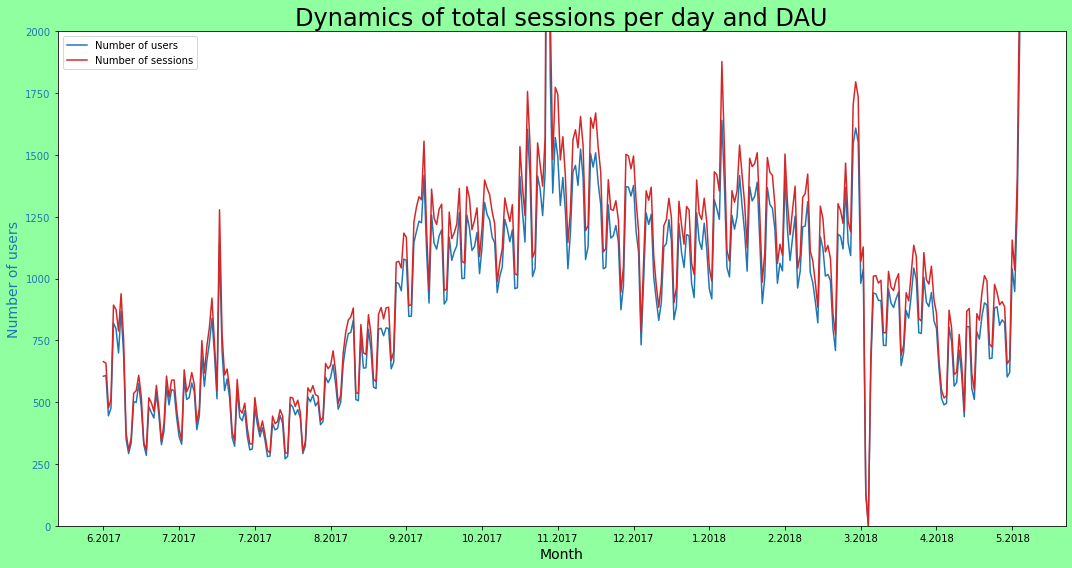

In [29]:
# graph 1. DAU (total sessions and DAU)
fig, ax1 = plt.subplots(figsize=(15, 8))
color_ax1 = 'tab:blue'
color_ax2 = 'tab:red'
plt.plot(dau_graph['uid'],color = color_ax1)
plt.plot(dau_graph['count_sessions'],color = color_ax2)

x_pos = np.arange(len(dau_graph['uid']))
fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of users', fontsize=14, color=color_ax1)
plt.tick_params(axis='y', labelcolor=color_ax1)
plt.title('Dynamics of total sessions per day and DAU', fontsize=24)
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax1.xaxis.set_major_locator(loc)
ax1.set_ylim([0, 2000])
plt.legend(["Number of users", "Number of sessions"])

fig.tight_layout() 
plt.show()

Conslusion:<br />
As we can see the "Number of sessions" chart is always slightly ahead of the DAU chart. The lead is insignificant, which means that very rarely people use the service several times a day.


##### 2.1.2.2 The average number of sessions per user.<a name="session3"></a>

In [30]:
dau_graph['number_sessions_per_user'] = dau_graph['count_sessions']/dau_graph['uid']

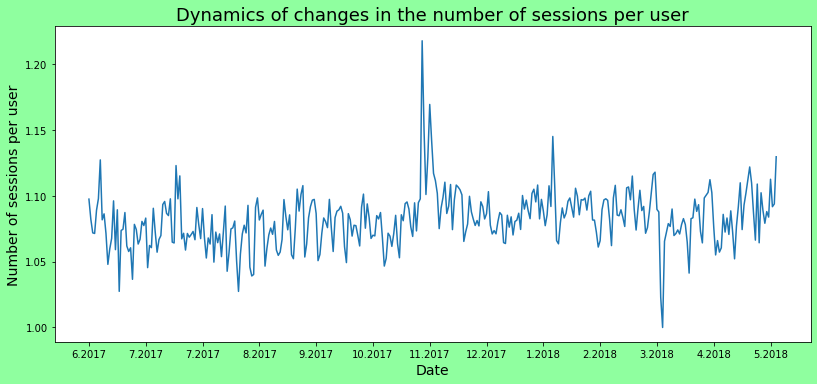

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(dau_graph['number_sessions_per_user'])
x_pos = np.arange(len(dau_graph['number_sessions_per_user']))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of sessions per user', fontsize=14)
ax.set_title('Dynamics of changes in the number of sessions per user', fontsize=18)
fig.patch.set_facecolor('xkcd:mint green')
plt.xticks(x_pos,dau_graph['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)

plt.show()

Conclusion:<br />
As we can see, during the entire observation period, the number of sessions per user varies from 1.05 to 1.15. This means that people do not need to use our service several times a day.

<div class="alert alert-success" role="alert">
Excellent!
</div>

##### 2.1.2.3 Distribution of sessions by device type.<a name="session4"></a>

In [32]:
sessions_touch = ( 
    visits[visits['device'] == 'touch'].
    groupby(['year','month','day']).
    agg({'uid':'count'}).reset_index()
)
sessions_touch   = sessions_touch.rename(columns = {'uid':'count_sessions'})
sessions_desktop = ( 
    visits[visits['device'] == 'desktop'].
    groupby(['year','month','day']).
    agg({'uid':'count'}).reset_index()
)
sessions_desktop  = sessions_desktop.rename(columns = {'uid':'count_sessions'})


In [33]:
def create_column_date(df):
    df['day']    = df['day'].astype('string')
    df['month']  = df['month'].astype('string')
    df['year']   = df['year'].astype('string')
    df['xticks'] = df['month'] + '.' + df['year']
    df['date']   = df['day'] + '.' + df['month'] + '.' + df['year']    
    return df
create_column_date(sessions_desktop)
create_column_date(sessions_touch)
sessions_desktop = sessions_desktop.rename(columns = {'count_sessions':'column_name_desktop'})
sessions_touch   = sessions_touch.rename(columns = {'count_sessions':'column_name_touch'})
sessions_desktop = sessions_desktop.merge(sessions_touch, on = 'date')
sessions_desktop = sessions_desktop[['column_name_desktop','column_name_touch','xticks_x','date']]


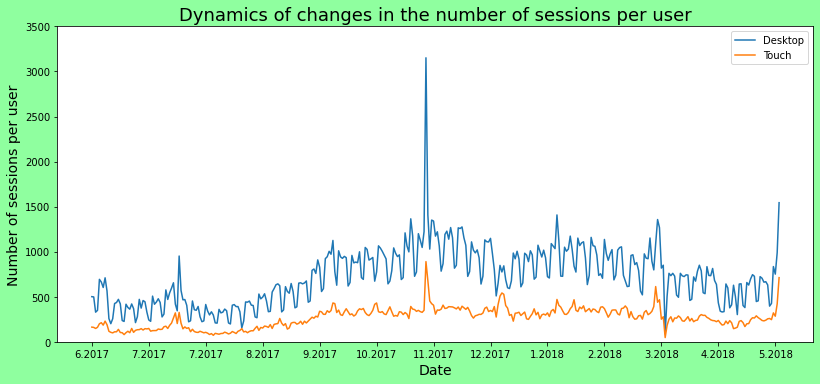

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(sessions_desktop['column_name_desktop'])
ax.plot(sessions_desktop['column_name_touch'])
x_pos = np.arange(len(sessions_desktop['column_name_touch']))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of sessions per user', fontsize=14)
ax.set_title('Dynamics of changes in the number of sessions per user', fontsize=18)
fig.patch.set_facecolor('xkcd:mint green')
plt.xticks(x_pos,sessions_desktop['xticks_x'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)
ax.set_ylim([0, 3500])
plt.legend(["Desktop", "Touch"])
plt.show()


Conclusion:<br />
As we can see in the graph, our service is used about 3 times more often from a personal computer than from a mobile device. The graph also shows that mobile phone users use services more evenly throughout the week, while PC users have significantly reduced sessions on weekends. This is due to the fact that a mobile phone is always with us, while many users use a PC at work.

##### 2.1.3 The duration of each session.<a name="duration"></a>

In [35]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Let's examine the resulting data.

count   359400.00
mean       643.51
std       1016.33
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      84480.00
Name: session_duration_sec, dtype: float64

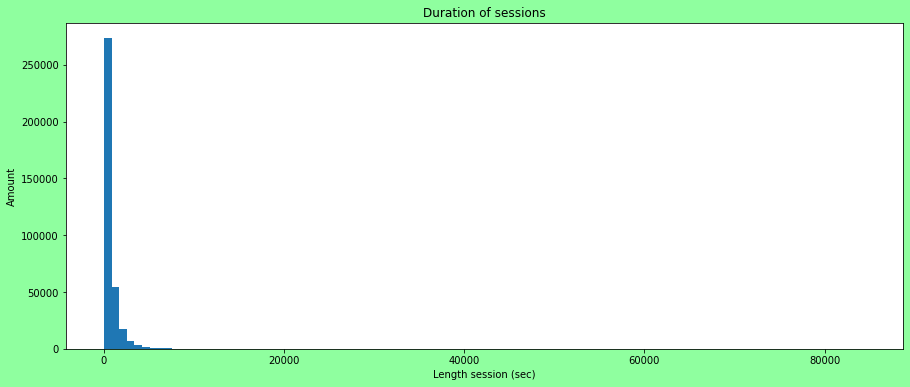

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
plt.hist(visits['session_duration_sec'], density=False,bins= 100)
plt.title('Duration of sessions')
plt.ylabel('Amount')
plt.xlabel('Length session (sec)')
#Data structure
visits['session_duration_sec'].describe()

<div class="alert alert-warning" role="alert">
Your histogram looks a bit "rare" -- which isn't very informative. I would recommend to reduce the number of bins slightly -- for most dataframes 100 is usually an overkill. 20-30 should be more appropriate.
<br>
Also, try to use a logarithmic OY scale and see if it looks any better ;) 
</div>

As you can see, the graph is not informative, it can be assumed that there are outliers.
Let's discard the outliers and build a histogram.

In [37]:
#outlier function
def outliers_lower_upper(name_df,column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)

outliers_duration_sessions = outliers_lower_upper(visits,'session_duration_sec')
print('Outliers "Duration sessions" is ',outliers_duration_sessions)


Outliers "Duration sessions" is  (0, 1920.0)


In [38]:
visits_without_outliers = (
    visits[visits['session_duration_sec'] < outliers_duration_sessions[1]]
)

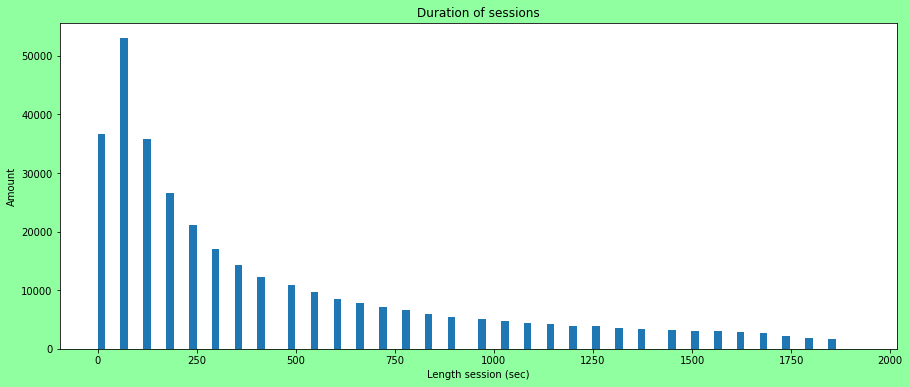

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
plt.hist(visits_without_outliers['session_duration_sec'],
         density=False,
         bins= 100,
         range=(0,1920))
plt.title('Duration of sessions')
plt.ylabel('Amount')
plt.xlabel('Length session (sec)')
plt.show()

<div class="alert alert-warning" role="alert">
Same comment here about bins and logscale =)
</div>

Conclusion:<br />
The distribution is normal and we can take the **median** to find out the average session length.

In [40]:
visit_avg_lenght = visits_without_outliers['session_duration_sec'].mean()
print('The average session duration is {:.0f} seconds.'.format(visit_avg_lenght))
asl = visits['session_duration_sec'].mode()
duration_zerro = len(visits_without_outliers.query('session_duration_sec == 0'))
print('Most often the session lasted ',asl[0],' seconds.')
print(duration_zerro, ' sessions of 0 seconds.')

The average session duration is 438 seconds.
Most often the session lasted  60  seconds.
35794  sessions of 0 seconds.


Conclusion:<br />
Average session duration of **7 minutes** (438 seconds). Most often, sessions lasted **1 minute** (60 seconds).<br />
There are **35794** sessions with a duration of 0 seconds, which means that a connection error occurred and the user was unable to use the service. This error could occur on the user's side (for example, the Internet did not work well) or on our side (for example, the server did not work).

##### 2.1.3.1 Dynamics of changes in the length of the session.<a name="duration1"></a>

In [41]:
duration = ( 
    visits_without_outliers.
    groupby(['year','month','day']).
    agg({'session_duration_sec':'mean'}).reset_index()
)
duration['month']  = duration['month'].astype('string')
duration['year']   = duration['year'].astype('string')
duration['xticks'] = duration['month'] + '.' + duration['year']

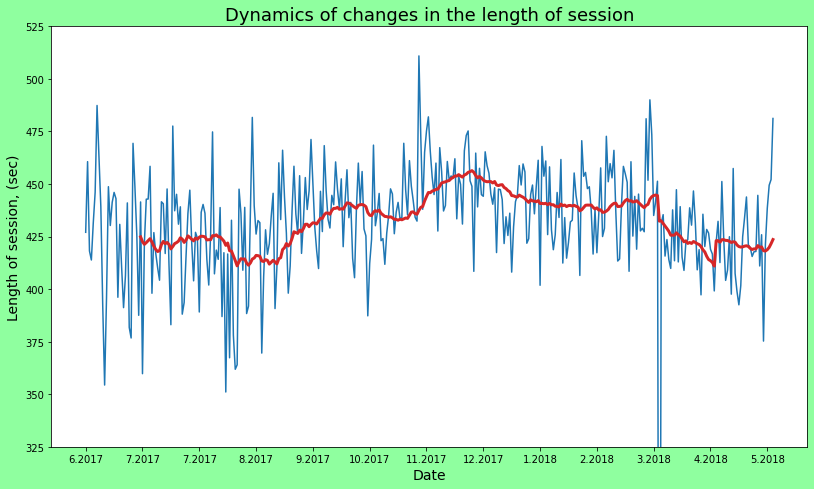

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(duration['session_duration_sec'])
x_pos = np.arange(len(duration['session_duration_sec']))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Length of session, (sec)', fontsize=14)
ax.set_title('Dynamics of changes in the length of session', fontsize=18)
fig.patch.set_facecolor('xkcd:mint green')
plt.xticks(x_pos,duration['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)
ax.set_ylim([325, 525])

# plot average line
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

NAvg = 30
XAvg = np.array(x_pos[NAvg - 1:])
YAvg = moving_average(duration['session_duration_sec'], NAvg)
ax.plot(XAvg,YAvg, color=color, linewidth=3.0)

plt.show()

Conclusion:<br />
As we can see in the graph, from August to December the session duration gradually increased, perhaps there were more offers and the user needed more time to choose what exactly he wants to order. Since December, there has been a gradual decrease in the duration of the session.


<div class="alert alert-warning" role="alert">
Ok, again -- these two lines, blue is the values, and red is moving average -- REALLY cool style, very informative, love it! But, please, don't forget the legend. Otherwise I can't tell what that means without checking your code directly.
</div>

##### 2.1.4 How often do users come back?<a name="come_back"></a>

In [43]:
visits_retention  = visits
def find_first_session(df, name_column, activity_type = 'first_session'):
    #Finding the date of the user's first visit
    visits_first = df.groupby(['uid']).agg({name_column:'min'})
    visits_first = visits_first.rename(columns = {name_column:activity_type})
    df = df.merge(visits_first, on = 'uid')   
    df[activity_type] = df[activity_type].dt.floor('1D')
    return df


In [44]:
def find_beginning_of_month_session(df):
    #Finding the date of the user's first visit
    df = find_first_session(df,'date')
    #We find the first day of the month in which the first contact took place
    df['first_session'] = (
        pd.to_datetime(df['first_session'], unit='d') 
        -
        pd.to_timedelta(df['first_session'].dt.day - 1, unit='d') 
    )
    # We find the first day of the month in which the current contact took place
    df['active_session'] = (
        pd.to_datetime(df['date'], unit='d') 
        -
        pd.to_timedelta(df['date'].dt.day - 1, unit='d') 
    )
    return df

visits_retention = find_beginning_of_month_session(visits_retention)


In [45]:
def calculate_cohort_lifetime(df):
    # We calculate how many months have passed between the current and the first contact
    df['cohort_lifetime'] = (
        round(((df['active_session'] - df['first_session']) / 
               np.timedelta64(1,'M'))).astype(int)
    )

    # counting the number of unique users in each cohort every month
    cohorts = (
        df.groupby(['first_session','cohort_lifetime']).
        agg({'uid':'nunique'}).
        reset_index()
    )
    unique_users_first_month = cohorts[cohorts['cohort_lifetime'] == 0]
    unique_users_first_month = ( 
        unique_users_first_month.
        rename(columns = {'uid':'cohort_0',
                          'cohort_lifetime':'cl2'})
    )
    cohorts = cohorts.merge(unique_users_first_month, on = 'first_session')
    
    # counting the retention rate
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_0']
    cohorts['first_month_str']= cohorts['first_session'].dt.strftime('%Y.%m')

    # Let's group the data for display in hotmap
    cohorts_pivot_table = (
        cohorts.
        pivot_table(index='first_month_str',
                    columns='cohort_lifetime',
                    values='retention',
                    aggfunc='sum')
    )
    return cohorts_pivot_table

cohorts_pivot_table = calculate_cohort_lifetime(visits_retention)

Text(0.5, 51.0, 'Lifetime')

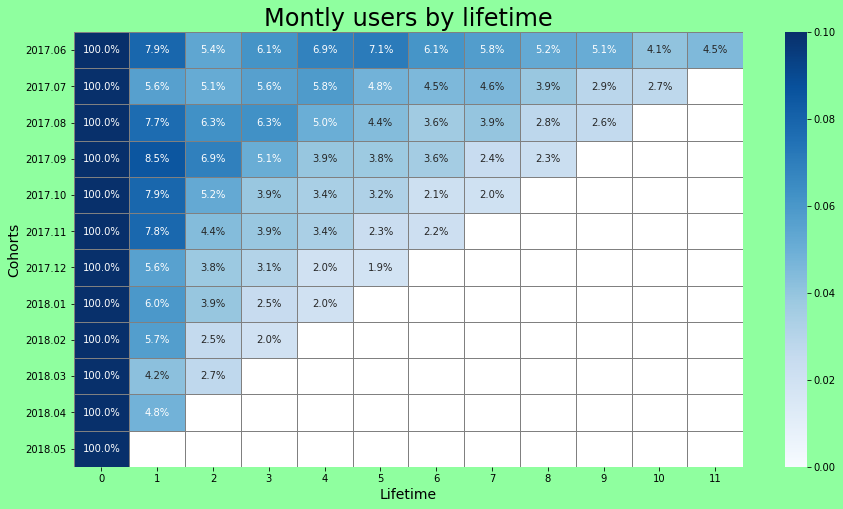

In [46]:
#Let's build a hotmap:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Montly users by lifetime', fontsize=24)
    
sns.heatmap(cohorts_pivot_table, 
            annot= True,
            fmt = '.1%',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 0.1,
            cmap = 'Blues' 
           )
ax.set_ylabel('Cohorts', fontsize=14)    
ax.set_xlabel('Lifetime', fontsize=14)
    

Conclusion:<br />
As we can see, no more than 9% of users simultaneously re-access our service from the next months. And every month the number of users decreases. That is, we spend money on attracting clients, but after the first experience of cooperation, most clients do not contact us again. We need to figure out the reasons why users were unhappy and fix them. It is much cheaper to retain a customer than to attract a new one. Next, we will calculate how many users have contacted us for more than 1 time

<div class="alert alert-success" role="alert">
Ok, the numbers look just about right, good job! =)
</div>

##### Let's see if lifetime differs from device type.

In [47]:
visits_retention_touch    = visits[visits['device'] == 'touch']
visits_retention_desktop  = visits[visits['device'] == 'desktop']

#Data preparation
#touch
visits_retention_touch      = find_beginning_of_month_session(visits_retention_touch)
cohorts_pivot_table_touch   = calculate_cohort_lifetime(visits_retention_touch)

#desktop
visits_retention_desktop    = find_beginning_of_month_session(visits_retention_desktop)
cohorts_pivot_table_desktop = calculate_cohort_lifetime(visits_retention_desktop)

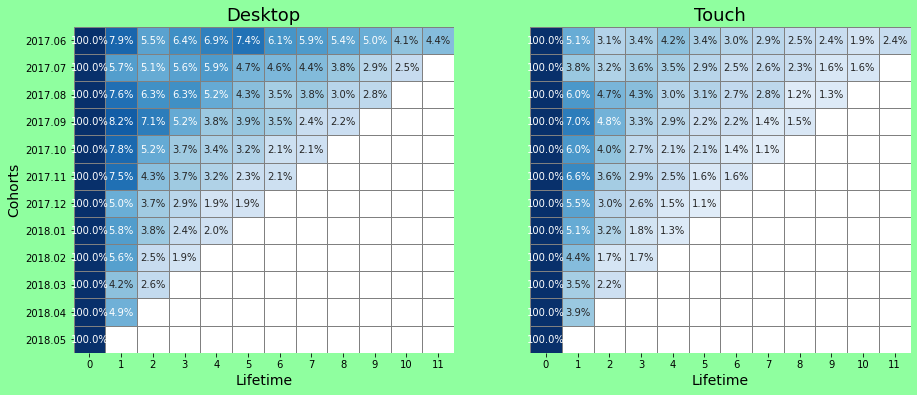

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
ax1 = plt.subplot(121)
res = sns.heatmap(cohorts_pivot_table_desktop, 
                  annot= True,
                  fmt = '.1%',
                  linewidths = 1,
                  linecolor = 'grey',
                  vmin = 0,
                  vmax = 0.1,
                  cmap = 'Blues',
                  cbar = False
                 )
ax1.set_ylabel('Cohorts', fontsize=14)       
ax1.set_xlabel('Lifetime', fontsize=14)
ax1.set_title('Desktop', fontsize=18)
    
ax2 = plt.subplot(122)
res = sns.heatmap(cohorts_pivot_table_touch, 
                  annot= True,
                  fmt = '.1%',
                  linewidths = 1,
                  linecolor = 'grey',
                  vmin = 0,
                  vmax = 0.1, 
                  cmap = 'Blues',
                  yticklabels = False, 
                  xticklabels = True,
                  cbar = False
                 )

ax2.set_ylabel('')  
ax2.set_xlabel('Lifetime', fontsize=14)
ax2.set_title('Touch', fontsize=18)
plt.show()

Conclusion: <br />
As you can see from the graphs, users who use Desktop are more likely to reuse the service. Perhaps the mobile version has flaws that need to be improved.

<div class="alert alert-success" role="alert">
Wow, nice style!
</div>

##### Let's calculate what% of users have used the service more than once.

In [49]:
uniq_user = len(visits.groupby('uid').agg({'uid':'nunique'}))

count_user = visits.groupby('uid').agg({'uid':'count'})
only_ones_visit = len(count_user[count_user['uid'] == 1])
print('Total {:} unique users.'.format(uniq_user))
print('{:} ({:.1%}) clients have used more than once.'.format(uniq_user - only_ones_visit,
                                                        (uniq_user - only_ones_visit)/uniq_user))

Total 228169 unique users.
52128 (22.8%) clients have used more than once.


#### 2.2 Sales<a name="sales"></a>

#### 2.2.1 How long does it take between the first visit and the first purchase?<a name="conversion"></a>

In [50]:
# # Let's add the date of the first order in the Orders table
# orders = find_first_session(orders,'buy_ts','first_order')

In [51]:
# Let's find the date of the first order in the Orders table
orders_first = orders.groupby('uid').agg({'buy_ts':'min'})
orders_first = orders_first.rename(columns = {'buy_ts':'first_order'})
orders_first['first_order'] = orders_first['first_order'].dt.floor('1D')

In [52]:
# Let's group the data about the first sessions
visits_conversion = visits[['device','uid','date','source_id']]
visits_conversion = visits_conversion.sort_values(by = 'date')

visits_conversion  =  (
    visits_conversion.
    groupby('uid').
    agg({'date':'min','device':'first','source_id':'first'}) 
)
visits_conversion = visits_conversion.rename(columns = {'date':'first_session'})

In [53]:
#Let's combine the Orders_First and Visits_First tables
conversion_first = orders_first.merge(visits_conversion, on= 'uid', how = 'left')

In [54]:
# Let's calculate the conversion time
conversion_first['term'] = (
    ((conversion_first['first_order'] - conversion_first['first_session']) 
    / np.timedelta64(1,'D')).astype('int')
)

##### 2.2.1.1 Average conversion<a name="conversion1"></a>

In [55]:
#1
avg_conversion = conversion_first['term'].mean()
print('Average conversion is {:.1f} days.'.format(avg_conversion))

Average conversion is 16.9 days.


##### 2.2.1.2 Distribution of conversions by source<a name="conversion2"></a>

In [56]:
conversion_by_source = conversion_first.groupby('source_id').agg({'term':['mean','count']}).reset_index()
conversion_by_source.columns = ['source_id','mean','count']
conversion_by_source['ratio_count'] = ( 
    conversion_by_source['count'] / conversion_by_source['count'].sum()*100    
)
def create_label(item):
    text = 'Source ' + str(int(item['source_id']))
    return text
conversion_by_source['label'] = conversion_by_source.apply(create_label,axis=1)


In [57]:
conversion_by_source = conversion_by_source[conversion_by_source['mean'] != 0].reset_index()

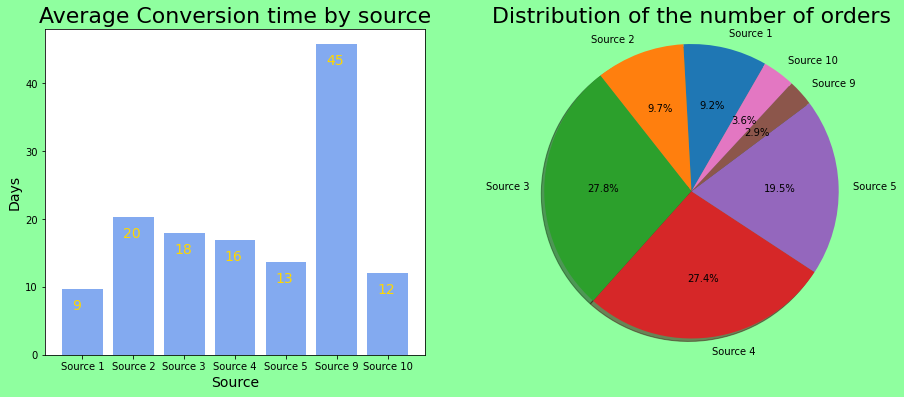

In [58]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
ax1 = plt.subplot(121)

n = len(conversion_by_source['label'])
ind = np.arange(n) 

res = plt.bar(ind, conversion_by_source['mean'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

plt.xlabel('Source', fontsize=14)
plt.ylabel('Days', fontsize=14)
plt.title('Average Conversion time by source', fontsize=22)
plt.xticks(ind, conversion_by_source['label'])
for idx,i in enumerate(ax1.patches):
    ax1.text(i.get_x() + .2, 
             i.get_height() - 3, 
             int(conversion_by_source['mean'][idx]), 
             fontsize=14,color='gold')
   
ax2 = plt.subplot(122)
res = ax2.pie(conversion_by_source['ratio_count'],
#         explode = explode ,
        labels  = conversion_by_source['label'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 60)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of the number of orders', fontsize=22)

plt.show()


Conclusion:<br />
As we can see, there are no orders from sources 6,7,8. A very long conversion period at source 9. Perhaps because of such a long period, only 2.9% of orders come from source 9. The most popular sources are 3 and 4, and their conversion time is 18 and 16 days, respectively. Best conversion time from 1 source.

<div class="alert alert-success" role="alert">
Majestic! =)
</div>

##### 2.2.1.3 Distribution of conversions by term<a name="conversion3"></a>

In [59]:
# determining the type of conversion
def type_conversion(term):
    if term == 0:
        return 'Conversion 0d'
    if term <=7:
        return 'Conversion 7d'
    if term <=14:
        return 'Conversion 14d'
    if term <=30:
        return 'Conversion 30d'
    else:
        return 'Conversion >30d'

In [60]:
# Let's calculate the shares of each type of conversion
conversion_first['type_conversion'] = conversion_first['term'].apply(type_conversion)
conversion_shares = conversion_first.groupby('type_conversion').agg({'type_conversion':'count'})
conversion_shares = conversion_shares.rename(columns = {'type_conversion':'count'})
conversion_shares = conversion_shares.reset_index()
conversion_shares['ratio'] = conversion_shares['count']/conversion_shares['count'].sum()*100


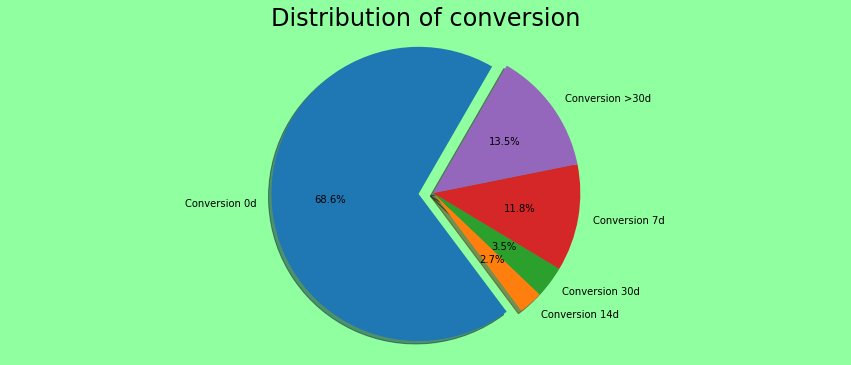

In [61]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
explode = (0.1, 0, 0, 0, 0)
ax1.pie(conversion_shares['ratio'],
        explode = explode ,
        labels  = conversion_shares['type_conversion'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of conversion', fontsize=24)
plt.show()

Conclusion:<br />
As we can see from the pie chart, **68%** of orders are made on the day of the first visit to the site. **11.8%** of users make the order within a week after the first visit. More than **13%** make their first order no earlier than a month after the first visit.

<div class="alert alert-success" role="alert">
Very nice!
</div>

##### 2.2.1.4 Distribution of conversion by devices<a name="conversion4"></a>

In [62]:
conversion_by_device = conversion_first.groupby('device').agg({'term':['mean','count']}).reset_index()
conversion_by_device.columns = ['device','mean','count']
conversion_by_device['ratio_count'] = ( 
    conversion_by_device['count'] / conversion_by_device['count'].sum()*100    
)
conversion_by_device

,device,mean,count,ratio_count
0,desktop,15.97,29274,80.15
1,touch,20.65,7249,19.85


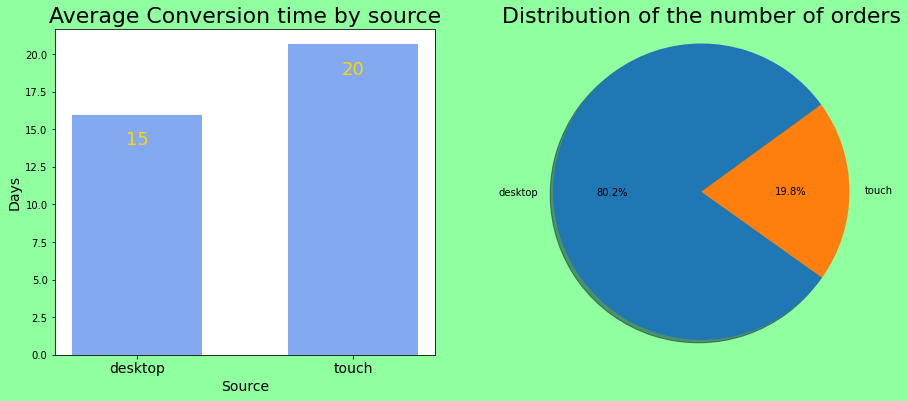

In [63]:
fig, ax1 = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
ax1 = plt.subplot(121)

n = len(conversion_by_device['device'])
ind = np.arange(n) 
bar_width = 0.6
res = plt.bar(ind, conversion_by_device['mean'],bar_width,
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

plt.xlabel('Source', fontsize=14)
plt.ylabel('Days', fontsize=14)
plt.title('Average Conversion time by source', fontsize=22)
plt.xticks(ind, conversion_by_device['device'], fontsize=14)
for idx,i in enumerate(ax1.patches):
    ax1.text(i.get_x() + .25, 
             i.get_height() - 2, 
             int(conversion_by_device['mean'][idx]), 
             fontsize=18,color='gold')
   
ax2 = plt.subplot(122)
res = ax2.pie(conversion_by_device['ratio_count'],
        labels  = conversion_by_device['device'],
        autopct = '%1.1f%%',
        shadow  = True,
        startangle = 36)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Distribution of the number of orders', fontsize=22)

plt.show()

Conclusion:<br />
As you can see from the pie chart, more than 80% of orders come from Desktop. The average order conversion time for **Desktop** is **15 days** and for **Touch 20 days**. The pie chart shows the distribution of orders between devices in the first order. Further, the share of orders between devices among all orders will also be calculated.

<div class="alert alert-success" role="alert">
Cool!
</div>

#### 2.2.2. The number of orders for each time period.<a name="orders"></a>

##### 2.2.2.1 Daily distribution of orders by source.<a name="orders1"></a>

In [64]:
orders_all = orders.merge(visits_conversion, on= 'uid', how = 'left')
orders_all['actual_date'] = orders_all['buy_ts'].dt.floor('1D')
# Counting the number of orders every day for each source
orders_per_day = ( 
    orders_all.
    groupby(['actual_date','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_day = orders_per_day.rename(columns = {'device':'count_orders'})
orders_per_day['label'] = orders_per_day.apply(create_label,axis=1)
source_dict  = orders_per_day.sort_values(by='source_id')['label'].unique().tolist()


In [65]:
# function to create a table 
def create_df_for_plot(type_source):
    df_source = (
        orders_per_day.query('label == @type_source')
        .pivot_table(index = 'actual_date',
                     values ='count_orders',
                     aggfunc ='sum')
    )
    return df_source

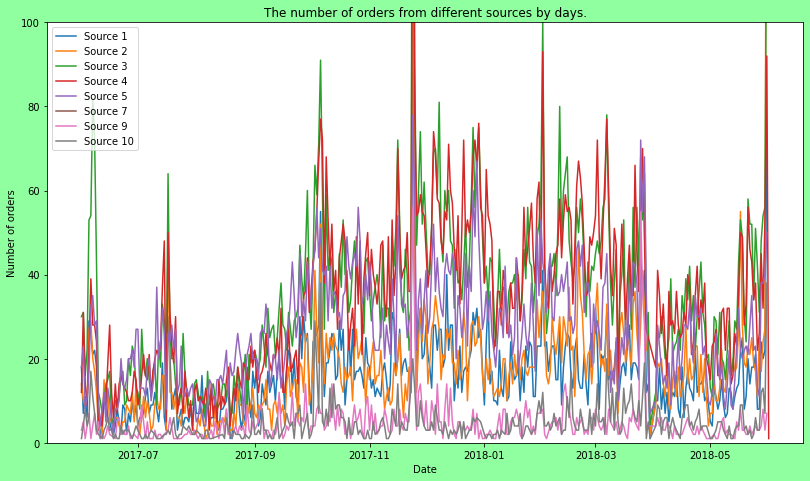

In [66]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
for item in source_dict:
     ax.plot(create_df_for_plot(item))

ax.set_xlabel('Date')
ax.set_ylabel('Number of orders')
plt.legend(source_dict)
ax.set_title('The number of orders from different sources by days.')
ax.set_ylim([0, 100])
fig.patch.set_facecolor('xkcd:mint green')

plt.show()

<div class="alert alert-warning" role="alert">
Eh.. probably not the best of choices for illustration. Don't know about you, but personally I can't tell the difference between the lines (mostly because they are too noisy). Perhaps your trick with moving average could help  to smooth things up a little bit? =)
</div>

Conclusion:<br />
As we can see, the graph is very detailed and not informative. It is very difficult to perceive information from it. Let's build a schedule based on the number of orders per week.

##### 2.2.2.2 Weekly distribution of orders by source..<a name="orders2"></a>

In [67]:
#Finding the first day of the week
orders_all['first_day_of_week'] = (
    pd.to_datetime(orders_all['actual_date'], unit='d') 
    -
    pd.to_timedelta(orders_all['actual_date'].dt.dayofweek, unit='d') 
)
# Calculating the number of orders for this week
orders_per_week = ( 
    orders_all.
    groupby(['first_day_of_week','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_week['label'] = orders_per_week.apply(create_label,axis=1)
orders_per_week = orders_per_week.rename(columns = {'device':'count_orders'})


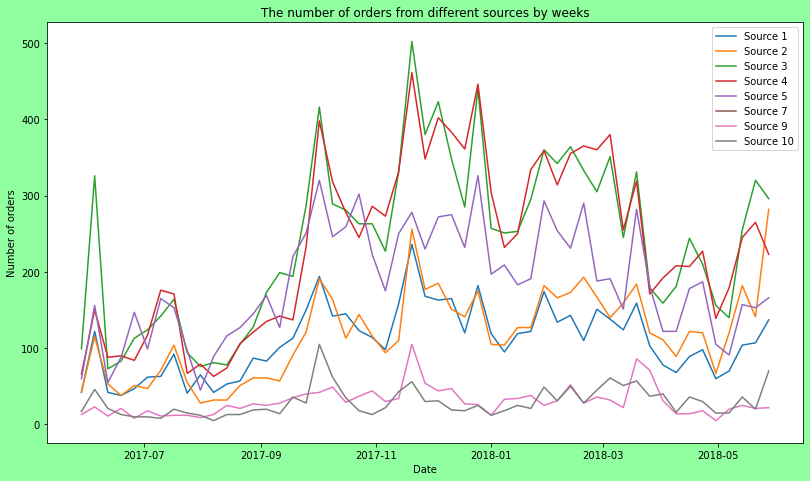

In [68]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
for type_source in source_dict:
     ax.plot(orders_per_week.query('label == @type_source')
             .pivot_table(index = 'first_day_of_week',
                          values ='count_orders',
                          aggfunc ='sum'))
ax.set_xlabel('Date')
ax.set_ylabel('Number of orders')
plt.legend(source_dict)
ax.set_title('The number of orders from different sources by weeks')
fig.patch.set_facecolor('xkcd:mint green')

plt.show()

<div class="alert alert-warning" role="alert">
Well, this looks better than daily, but still can be improved a bit, I think =) 
</div>

Conclusion:<br />
As we can see, in August 2017, orders from all sources were approximately at the same level, but then the number of orders from sources 3,4,5,2, and 1 began to grow. Orders from sources 3 and 4 have grown most of all. And from sources 9 and 10, a consistently low number of orders.

##### 2.2.2.3 Distribution of the number of orders by cohorts<a name="orders3"></a>

In [69]:
# Finding the first day of the month
orders_all['first_day_of_month_first_session'] = (
    pd.to_datetime(orders_all['first_session'], unit='d') 
    -
    pd.to_timedelta(orders_all['first_session'].dt.day-1, unit='d') 
)
# Calculating the number of orders for this month
orders_per_cohort = ( 
    orders_all.
    groupby(['first_day_of_month_first_session','source_id'],
            as_index=False).
    agg({'device':'count'})
)
orders_per_cohort['label'] = orders_per_cohort.apply(create_label,axis=1)
orders_per_cohort = orders_per_cohort.rename(columns = {'device':'count_orders'})


In [70]:
# We will find the share of orders from each source in each cohort.
orders_cohort_all = orders_per_cohort.groupby('first_day_of_month_first_session').agg({'count_orders':'sum'})
orders_cohort_all = orders_cohort_all.rename(columns = {'count_orders':'count_orders_all'})
orders_per_cohort = orders_per_cohort.merge(orders_cohort_all, 
                                            on = 'first_day_of_month_first_session')
orders_per_cohort['ratio'] = ( 
    orders_per_cohort['count_orders']/orders_per_cohort['count_orders_all']
)


In [71]:
# removing anomalies
orders_per_cohort = ( 
    orders_per_cohort[(orders_per_cohort['label'] != 'Source 7') 
    &
    (orders_per_cohort['first_day_of_month_first_session'] != '2018-06-01')]
)

orders_per_cohort['first_day_of_month_first_session'] = ( 
    orders_per_cohort['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

orders_per_cohort_pivot_table = orders_per_cohort.pivot_table(index = 'first_day_of_month_first_session', 
                                                              columns = 'label', 
                                                              values = 'ratio', 
                                                              aggfunc = 'max')

Text(0.5, 51.0, 'Source')

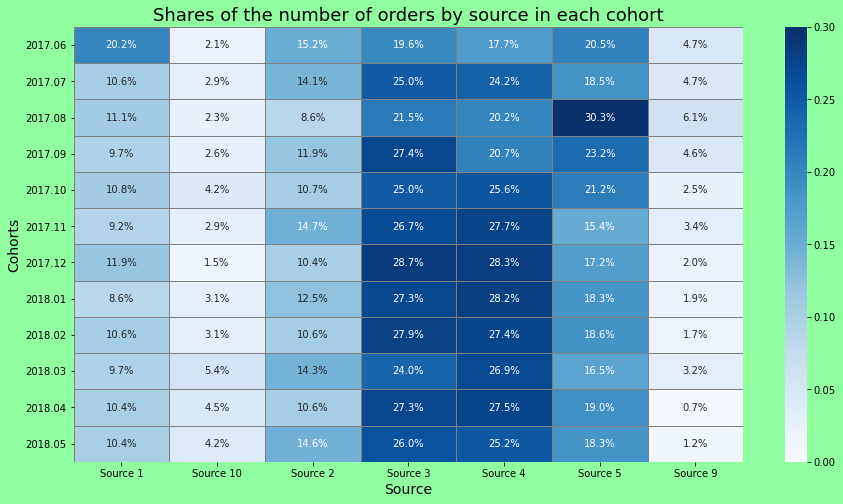

In [72]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Shares of the number of orders by source in each cohort', fontsize=18)
    
sns.heatmap(orders_per_cohort_pivot_table, 
            annot= True,
            fmt = '.1%',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 0.3,
            cmap = 'Blues',
            yticklabels = True,
           )
ax.set_ylabel('Cohorts', fontsize=14)   
ax.set_xlabel('Source', fontsize=14)


Conclusion:<br />
We see that the shares of Sources in different cohorts are approximately the same. However, there are exceptions. The share of source No. 1 in the first cohort is 2 times higher than in other cohorts, and the share of source No. 5 in the third cohort is noticeably higher than in others. It can be concluded that the shares change, but not much.

#### 2.2.3 The average purchase size.<a name="avg_orders"></a>

##### 2.2.3.1 The average size of percause by days.<a name="avg_orders1"></a>

In [73]:
revenue_per_day = ( 
    orders_all.
    groupby(['actual_date']).
    agg({'revenue':'mean'})
)

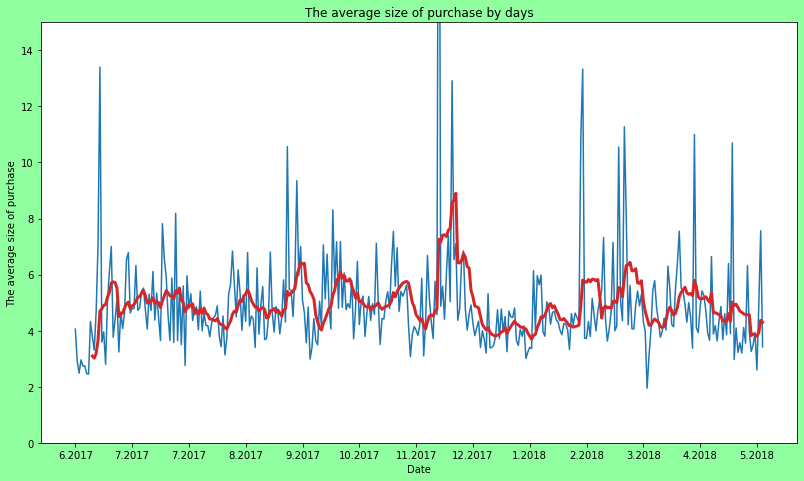

In [74]:
# Let's build graphs
fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(bottom=0.15, left=0.2)
x_pos = np.arange(len(revenue_per_day))
XAvg = np.array(x_pos)
ax.plot(XAvg,revenue_per_day['revenue'])
ax.set_xlabel('Date')
ax.set_ylabel('The average size of purchase')
ax.set_title('The average size of purchase by days')
ax.set_ylim([0, 15])
fig.patch.set_facecolor('xkcd:mint green')

plt.xticks(x_pos,duration['xticks'])
loc = ticker.MultipleLocator(base=30) 
ax.xaxis.set_major_locator(loc)
# plot average line
NAvg = 10
XAvg = np.array(x_pos[NAvg - 1:])
YAvg = moving_average(revenue_per_day['revenue'], NAvg)
ax.plot(XAvg,YAvg, color=color, linewidth=3.0)

plt.show()

<div class="alert alert-success" role="alert">
Pretty cool, yeah =)
</div>

Conclusions:<br />
The average purchase price ranges from 4-6, with a sharp rise in December 2017 to 9.

##### 2.2.3.2 The average size of purchase by source<a name="avg_orders2"></a>

In [75]:
revenue_source = ( 
    orders_all.
    groupby(['source_id'],as_index=False).
    agg({'revenue':'mean'})
)
revenue_source['label'] = revenue_source.apply(create_label,axis=1)

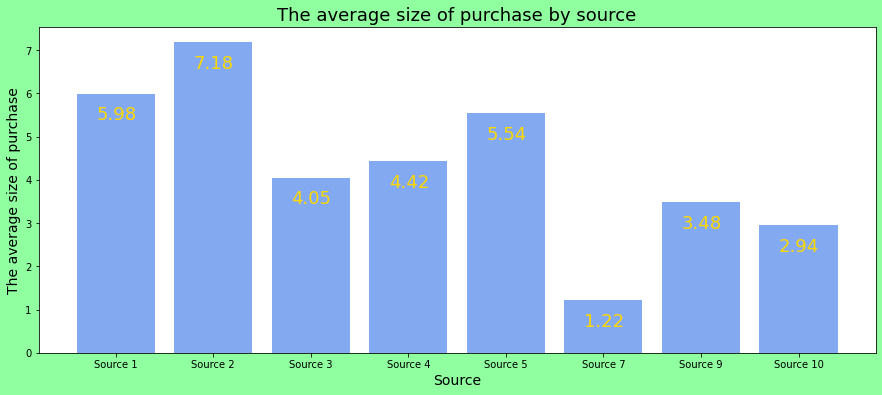

In [76]:
# create a plot

n = len(revenue_source['label'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, revenue_source['revenue'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Source', fontsize=14)
plt.ylabel('The average size of purchase', fontsize=14)
plt.title('The average size of purchase by source', fontsize=18)
plt.xticks(ind, revenue_source['label'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.2, 
            i.get_height()-0.6, 
            float(int(revenue_source['revenue'][idx]*100)/100), 
            fontsize=18,color='gold')
plt.show()

Conclusion: <br />
As we can see, the largest average revenue from resources 2, 1, and 5. From the most popular resources (3 and 4), the average revenue is not so high.

##### 2.2.3.3 The average size of purchase by cohort<a name="avg_orders3"></a>

In [77]:
orders_all['first_day_of_month_str'] = ( 
    orders_all['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)

revenue_cohort = ( 
    orders_all.query('first_day_of_month_str != "2018.06"').
    groupby(['first_day_of_month_str']).
    agg({'revenue':'mean'})
)

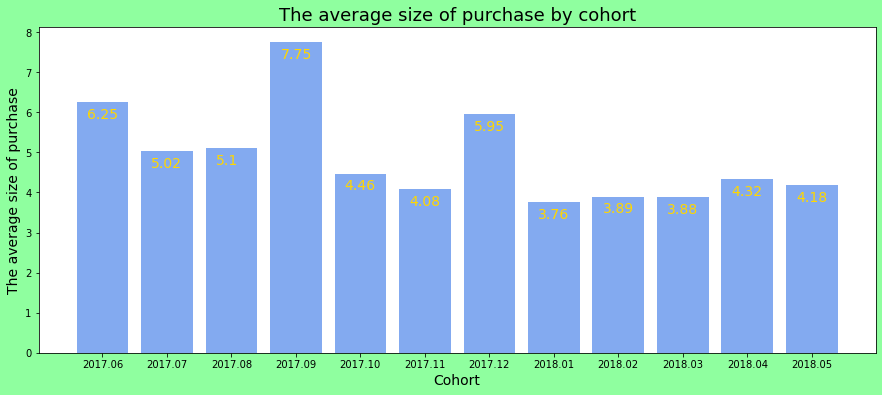

In [78]:
n = len(revenue_cohort['revenue'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, revenue_cohort['revenue'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('The average size of purchase', fontsize=14)
plt.title('The average size of purchase by cohort', fontsize=18)
plt.xticks(ind, revenue_cohort.index.values)
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.16, 
            i.get_height()-0.4, 
            float(int(revenue_cohort['revenue'][idx]*100)/100), 
            fontsize=14,color='gold')
plt.show()

Conclusion:<br />
As we can see, the average buy size ranges from 4.06 to 5.85. December 2017 has the most orders and the highest average purchase price.

#### 2.2.4 How much profit does one client bring?<a name="profit"></a>

##### 2.2.4.1  Average profit per client.<a name="profit1"></a>

In [79]:
ltv = orders_all.groupby('uid').agg({'revenue':'sum'}) #36523 records
ltv_avg = ltv.sum()[0] / len(ltv) 
print('Average profit per client ${:.1f}.'.format(ltv_avg))


Average profit per client $6.9.


##### 2.2.4.2 Average profit per client by source.<a name="profit2"></a>

In [80]:
# Determining from which source the first visit was
orders_all = orders_all.sort_values(by = 'buy_ts') #50415 records
source_first = orders_all.groupby('uid').agg({'source_id':'first'})
source_first = source_first.rename(columns = {'source_id':'source_id_first'}) #36523 records
orders_all = orders_all.merge(source_first, on = 'uid')

In [81]:
# LTV calculation from each source
ltv_source_all = orders_all.groupby(['uid','source_id_first']).agg({'revenue':'sum'}) #36523 records
ltv_source = ( 
    ltv_source_all.
    groupby('source_id_first').
    agg({'revenue':['sum','count']})
    .reset_index()
)
ltv_source.columns = ['source_id','sum','count']
ltv_source['ltv_customer'] = ltv_source['sum'] / ltv_source['count']
ltv_source['label'] = ltv_source.apply(create_label,axis=1) #create label for graph
ltv_source = ltv_source[ltv_source['label'] != 'Source 7'].reset_index() # reject anomaly

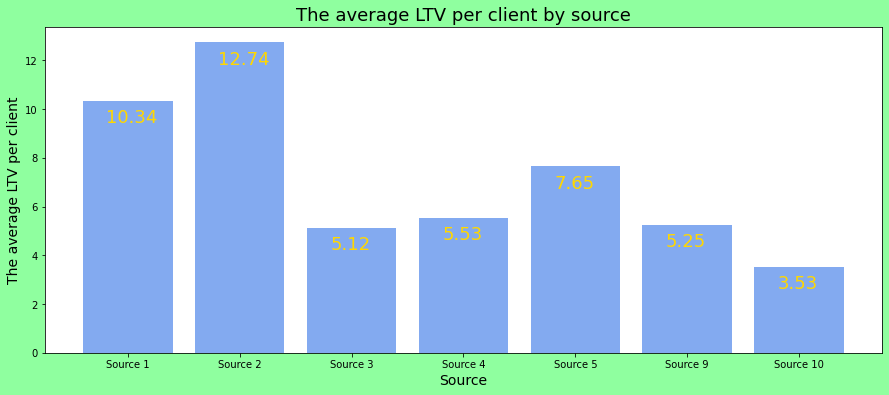

In [82]:
n = len(ltv_source['ltv_customer'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, ltv_source['ltv_customer'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Source', fontsize=14)
plt.ylabel('The average LTV per client', fontsize=14)
plt.title('The average LTV per client by source', fontsize=18)
plt.xticks(ind, ltv_source['label'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.21, 
            i.get_height()-0.9, 
            float(int(ltv_source['ltv_customer'][idx]*100)/100), 
            fontsize=18,color='gold')
plt.show()

Conclusion:<br />
As we can see, the largest LTVs are from sources 1 and 2. If the costs of attracting customers from these sources are profitable (as we will learn in the next section), then it is necessary to increase the number of orders from these sources. As we learned earlier, these sources account for approximately 10% of orders.

##### 2.2.4.3 Average profit per client by cohort<a name="profit3"></a>

In [83]:
# We find the first day of the month in which the current contact took place
orders_all['first_day_of_month_actual_order'] = (
    pd.to_datetime(orders_all['actual_date'], unit='d') 
    -
    pd.to_timedelta(orders_all['actual_date'].dt.day - 1, unit='d') 
)

In [84]:
# Ley's Find out how many months have passed between the current order and the first contacts
orders_all['cohort_lifetime'] = (
    round(((orders_all['first_day_of_month_actual_order'] 
            -
            orders_all['first_day_of_month_first_session']) / 
           np.timedelta64(1,'M'))).astype(int)
)
# orders_all['cohort_lifetime'].value_counts()

In [85]:
# calculating the number of unique users in each cohort every month
cohorts_ltv = (
    orders_all.query('actual_date != "2018-06-01"').
    groupby(['first_day_of_month_first_session','cohort_lifetime']).
    agg({'revenue':['sum','count']}).
    reset_index().reset_index()
)
cohorts_ltv.columns = ['index',
                       'first_day_of_month_first_session',
                       'cohort_lifetime',
                       'revenue',
                       'count_orders']
# counting the number of clients in each cohort
cohorts_ltv_0 = (
    orders_all.
    groupby('first_day_of_month_first_session').
    agg({'uid':'nunique'}).reset_index()
)
cohorts_ltv_0 = cohorts_ltv_0.rename(columns = {'uid':'count_orders_all'})
cohorts_ltv = cohorts_ltv.merge(cohorts_ltv_0, on = 'first_day_of_month_first_session')
# cohorts_ltv # 79 records

In [86]:
# Let's calculate the total amount of purchases in each cohort
cohorts_cumsum = ( 
    cohorts_ltv.
    groupby('first_day_of_month_first_session').
    agg({'revenue':'cumsum'}).
    reset_index()
)
cohorts_cumsum = cohorts_cumsum.rename(columns = {'revenue':'revenue_all'})
cohorts_ltv = cohorts_ltv.merge(cohorts_cumsum, on = 'index')
cohorts_ltv['revenue_per_user'] = cohorts_ltv['revenue_all']/cohorts_ltv['count_orders_all']
cohorts_ltv = cohorts_ltv[cohorts_ltv['first_day_of_month_first_session'] != '2018-06-01']
cohorts_ltv['first_day_of_month_first_session_str'] = ( 
    cohorts_ltv['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)
# cohorts_ltv

In [87]:
# Let's create a pivot table with LTV information for each cohort
cohorts_ltv_pivot_table = cohorts_ltv.pivot_table(index = 'first_day_of_month_first_session_str',
                                              columns = 'cohort_lifetime',
                                              values = 'revenue_per_user',
                                              aggfunc = 'sum')
# cohorts_ltv_pivot_table

Text(0.5, 51.0, 'Cohort Lifetime')

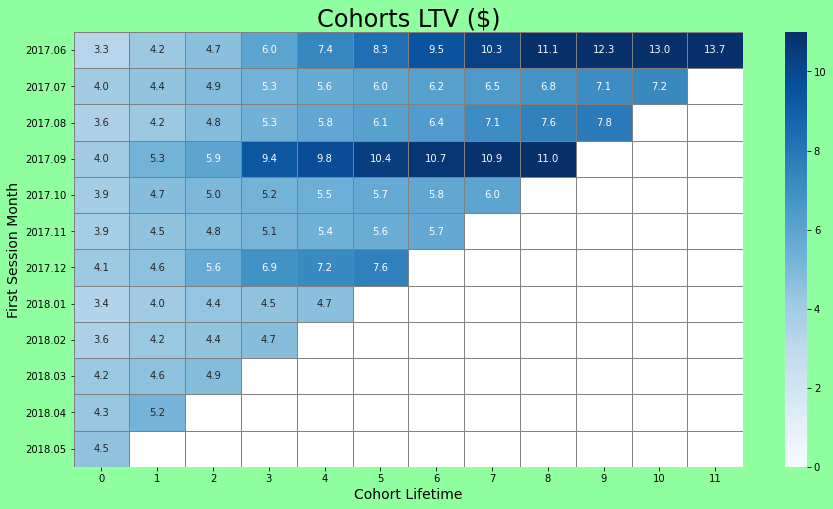

In [88]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Cohorts LTV ($)', fontsize=24)
    
sns.heatmap(cohorts_ltv_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 11,
            cmap = 'Blues' 
           )
ax.set_ylabel('First Session Month', fontsize=14)    
ax.set_xlabel('Cohort Lifetime', fontsize=14)
    

Conclusion: <br />
On average, each customer from the first cohort brought **13.7 dollars** in revenue over their eleven-month lifetime. As we can see, not all cohorts bring the same profit per client. The most profitable were the first 4 cohorts. There is also an unexpectedly sharp rise in LTV in the fourth cohort in the fourth month from 5.9 to 9.4.

<div class="alert alert-success" role="alert">
Numbers seem to be correct, good job! =)
</div>

#### 2.3 Marketing<a name="marketing"></a>

##### 2.3.1 How much money was spent?<a name="costs"></a>

##### 2.3.1.1 Daily costs.<a name="costs1"></a>

In [89]:
costs #2542 records
costs_daily = costs.groupby('dt').agg({'costs':'sum'})

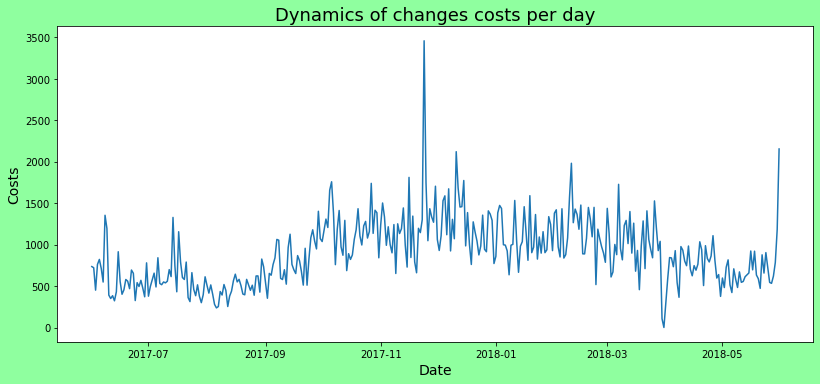

In [90]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(costs_daily, )
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Costs', fontsize=14)
ax.set_title('Dynamics of changes costs per day', fontsize=18)
fig.patch.set_facecolor('xkcd:mint green')
# ax.set_xlim(17480, 17500) # 24.11.2017

plt.show()

Conclusion: <br />
This graph is very similar to the number of visits per day. This is not surprising, because visits directly depend on the funds spent. Since August we have seen an increase in costs. From October to March, the costs are approximately at the same level, and from March, the cost of attracting customers has been decreasing.<br />
We also see a daily sharp increase in costs on November 24, 2017, from 1,200 to 3,500. This explains why in the previous parts we saw an abnormal number of orders, visits, income over the same period.

##### 2.3.1.2 How much was spent on each source?<a name="costs2"></a>

In [91]:
costs_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_source['label'] = costs_source.apply(create_label,axis=1) #create label for graph

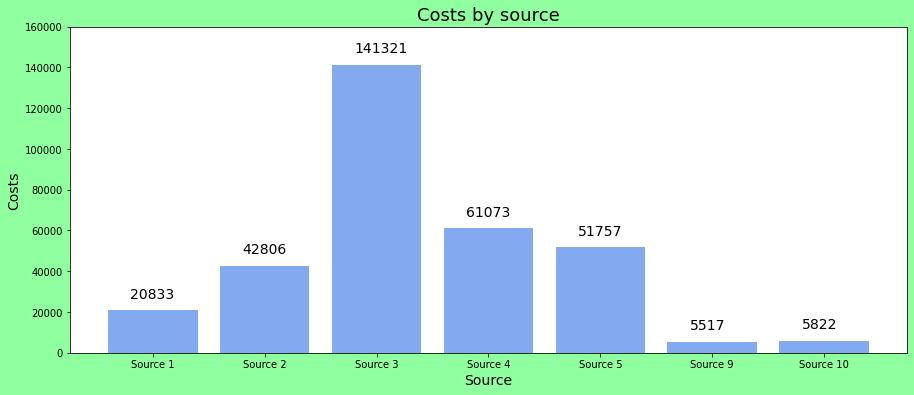

In [92]:
# create a plot
n = len(costs_source['costs'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_source['costs'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Source', fontsize=14)
plt.ylabel('Costs', fontsize=14)
plt.title('Costs by source', fontsize=18)
plt.xticks(ind, costs_source['label'] )
ax.set_ylim([0, 160000])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.2, 
            i.get_height() + 6000, 
            int(costs_source['costs'][idx]), 
            fontsize=14,color='black')
plt.show()

Conclusion:<br />
As we can see, the largest costs for **Source 3** are more than **2.5** times more than for **Source 4**, however, as we determined earlier, Sources 3 and 4 give approximately the same number of orders. Obviously, the advertising budget should be reallocated between Sources 3 and 4.

<div class="alert alert-success" role="alert">
Very nice! =)
</div>

#### 2.3.2 The cost of attracting customers.<a name="cac"></a>

##### 2.3.2.1  The cost of attracting customers by source.<a name="cac1"></a>

In [93]:
# Let's count the number of clients from each source
source_number_buyers = orders_all.query('source_id != 7').groupby('source_id',as_index = False).agg({'uid':'nunique'})
costs_source = costs_source.merge(source_number_buyers, on = 'source_id')
costs_source = costs_source.rename(columns = {'uid':'count_buyers'})

In [94]:
#Let's count CAC by source
costs_source['cac'] = costs_source['costs'] / costs_source['count_buyers']

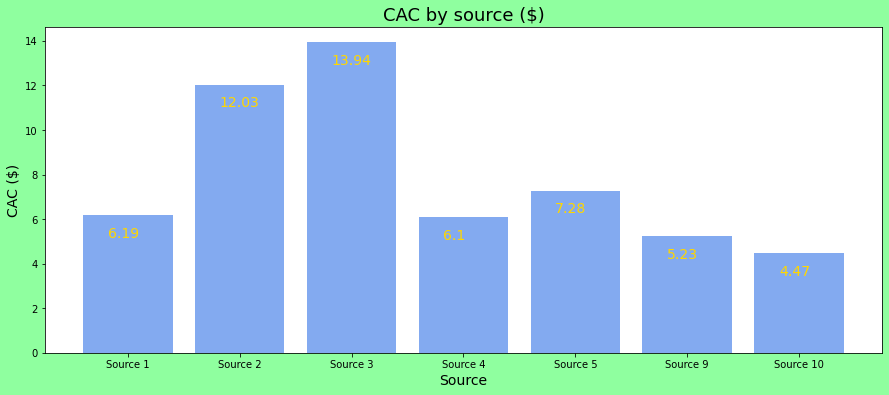

In [95]:
n = len(costs_source['cac'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_source['cac'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Source', fontsize=14)
plt.ylabel('CAC ($)', fontsize=14)
plt.title('CAC by source ($)', fontsize=18)
plt.xticks(ind, costs_source['label'] )
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.22, 
            i.get_height() - 1 , 
            float(int(costs_source['cac'][idx]*100)/100), 
            fontsize=14,color='gold')
plt.show()

Conclusion:<br /> As we can see, Sources 2 and 3 have the highest costs per customer acquisition. And if for Source 2 this is somehow justified by the fact that LTV is large enough, then for Source 3 and LTV is very small and the cost of attracting a new client is very high.

##### 2.3.2.2  The cost of attracting customers by cohort.<a name="cac2"></a>

In [96]:
# Finding the first day of the month
costs['first_day_of_month_first_session'] = (
    pd.to_datetime(costs['dt'], unit='d') 
    -
    pd.to_timedelta(costs['dt'].dt.day - 1, unit='d') 
)
costs_month = ( 
    costs.
    groupby('first_day_of_month_first_session', as_index = False).
    agg({'costs':'sum'})
)

In [97]:
costs_month = costs_month.merge(cohorts_ltv_0, on = 'first_day_of_month_first_session')
#Let's calculate CAC by cohorts
costs_month['cac'] = costs_month['costs'] / costs_month['count_orders_all'] 
costs_month['first_month_str']= ( 
    costs_month['first_day_of_month_first_session'].dt.strftime('%m.%Y')
)

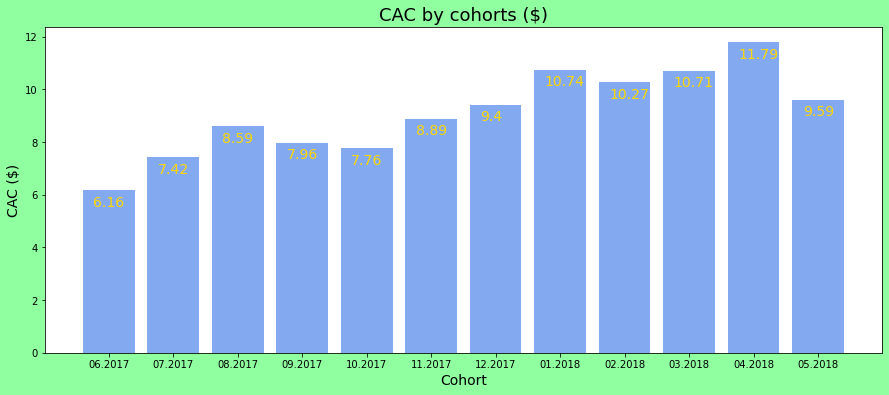

In [98]:
n = len(costs_month['cac'])
ind = np.arange(n) 

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(ind, costs_month['cac'],
        align='center',
        alpha=0.8, 
        color='cornflowerblue')

fig.patch.set_facecolor('xkcd:mint green')
plt.xlabel('Cohort', fontsize=14)
plt.ylabel('CAC ($)', fontsize=14)
plt.title('CAC by cohorts ($)', fontsize=18)
plt.xticks(ind, costs_month['first_month_str'])
for idx,i in enumerate(ax.patches):
    ax.text(i.get_x()+.16, 
            i.get_height()-0.6, 
            float(int(costs_month['cac'][idx]*100)/100), 
            fontsize=14,color='gold')
plt.show()

Conclusion:<br />
As we can see, the costs grow with each cohort. We know that some customers make their first purchase more than 30 days after their first visit. Thus, costs in cohorts 04.2018 and 05.2018 will decrease.

#### 2.3.3 Assessment of return on investment in customer acquisition. (ROI)<a name="romi"></a>

In [99]:
# Revenue from customers from each cohort.
cohorts_revenue = ( 
    orders_all.
    groupby('first_day_of_month_first_session', as_index = False).
    agg({'revenue':'sum'})
)

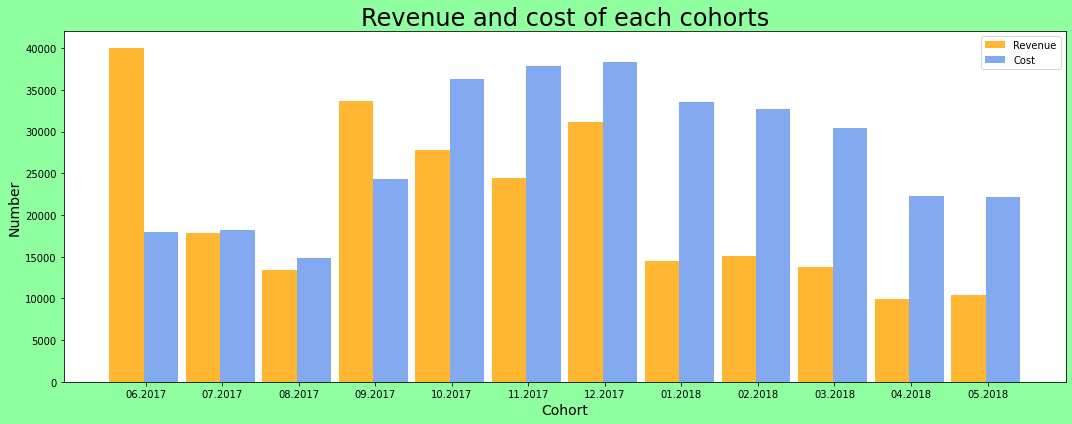

In [100]:
# one chart with two columns per cohorts / revenue + cost
all_cohorts_dict = list(costs_month['first_month_str'].tolist()) 
n_groups = len(all_cohorts_dict)

# create plot
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
index = np.arange(n_groups)
bar_width = 0.45
opacity = 0.8
rects1 = plt.bar(index, cohorts_revenue['revenue'], bar_width,
                 alpha=opacity,
                 color='orange',
                 label='Revenue')

rects2 = plt.bar(index + bar_width, costs_month['costs'], bar_width,
                 alpha=opacity,
                 color='cornflowerblue',
                 label='Cost')

plt.xlabel('Cohort', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title('Revenue and cost of each cohorts', fontsize=24)

plt.xticks(index + bar_width-0.2, all_cohorts_dict)
plt.legend()

plt.tight_layout()
plt.show()

Conclusion:<br />
As we can see in the histogram, in only 2 cohorts, revenue is greater than costs. This says that you need to look for problem areas and make adjustments.

<div class="alert alert-success" role="alert">
Correct!
</div>

##### 2.3.3.1 ROMI by cohort<a name="romi1"></a>

In [101]:
cohorts_romi = (
    cohorts_ltv.
    merge(costs_month[['first_day_of_month_first_session','costs']],
          on = 'first_day_of_month_first_session')
)
cohorts_romi['romi'] = cohorts_romi['revenue_all'] / cohorts_romi['costs']

In [102]:
# Let's create a pivot table with ROMI information for each cohort
cohorts_romi_pivot_table = cohorts_romi.pivot_table(index = 'first_day_of_month_first_session_str',
                                                    columns = 'cohort_lifetime',
                                                    values = 'romi',
                                                    aggfunc = 'sum')

Text(0.5, 51.0, 'Cohort Lifetime')

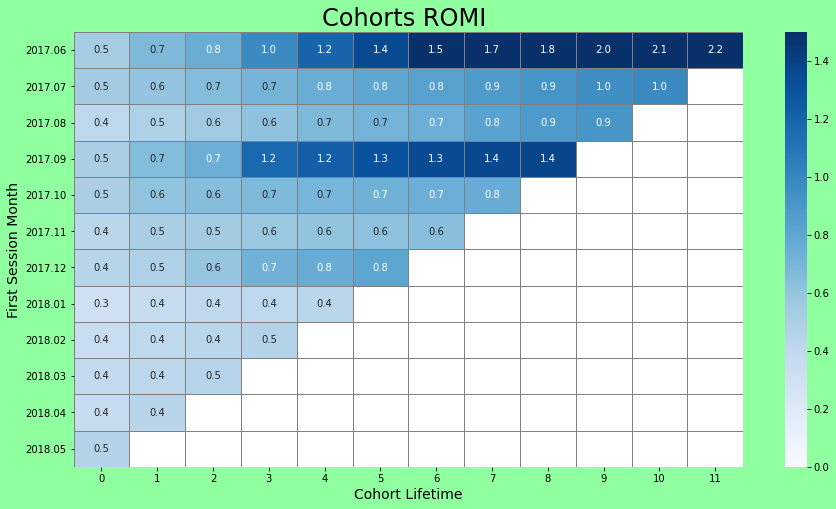

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Cohorts ROMI ', fontsize=24)
    
sns.heatmap(cohorts_romi_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1.5,
            cmap = 'Blues' 
           )
ax.set_ylabel('First Session Month', fontsize=14)    
ax.set_xlabel('Cohort Lifetime', fontsize=14)

Conclusion:<br />
As you can see from the graph, the profitability situation is very bad. The investment made in the promotion does not pay off. Only in three cohorts (1, 2, and 4), revenue exceeded costs. It can be assumed that if the costs pay off over time, then the current business model cannot be called successful. We urgently need to make adjustments. Also, we cannot assume for what month the cohort will return the funds invested in attracting a client since only 3 cohorts returned their investments, and 2 of them have clearly abnormal dynamics. It is difficult to make an accurate forecast based on the available data.

<div class="alert alert-success" role="alert">
Numbers look perfect, good job! =)
</div>

##### 2.3.3.2 ROMI by source<a name="romi2"></a>

In [104]:
source_romi = orders_all[['revenue',
                          'first_session',
                          'source_id',
                          'actual_date',
                          'first_day_of_month_first_session',
                          'first_day_of_month_actual_order']]

In [105]:
# # Ley's find out how many months have passed between the current order and the first contacts
source_romi['cohort_lifetime'] = (
    round(
        (((orders_all['first_day_of_month_actual_order'] 
           -
           orders_all['first_day_of_month_first_session']) / 
          np.timedelta64(1,'M')))).astype(int)
)

/Applications/anaconda3/envs/practicum/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [106]:
source_lifetime = (
    source_romi.
    groupby(['source_id','cohort_lifetime'],as_index = False).
    agg({'revenue':'sum'}).reset_index()
)

In [107]:
source_cumsum = ( 
    source_lifetime.
    groupby('source_id').
    agg({'revenue':'cumsum'}).reset_index()
)
source_cumsum = source_cumsum.rename(columns = {'revenue':'revenue_source'})

In [108]:
source_lifetime = source_lifetime.merge(source_cumsum, on = 'index')

In [109]:
source_cost = costs.groupby('source_id',as_index = False).agg({'costs':'sum'})

In [110]:
source_lifetime = source_lifetime.merge(source_cost, on = 'source_id')

In [111]:
source_lifetime['romi'] = source_lifetime['revenue_source'] / source_lifetime['costs']
source_lifetime['label'] = source_lifetime.apply(create_label,axis=1)


In [112]:
source_lifetime_pivot_table = source_lifetime.pivot_table(index = 'label',
                                                          columns = 'cohort_lifetime',
                                                          values = 'romi',
                                                          aggfunc = 'sum')


Text(0.5, 51.0, 'Cohort Lifetime')

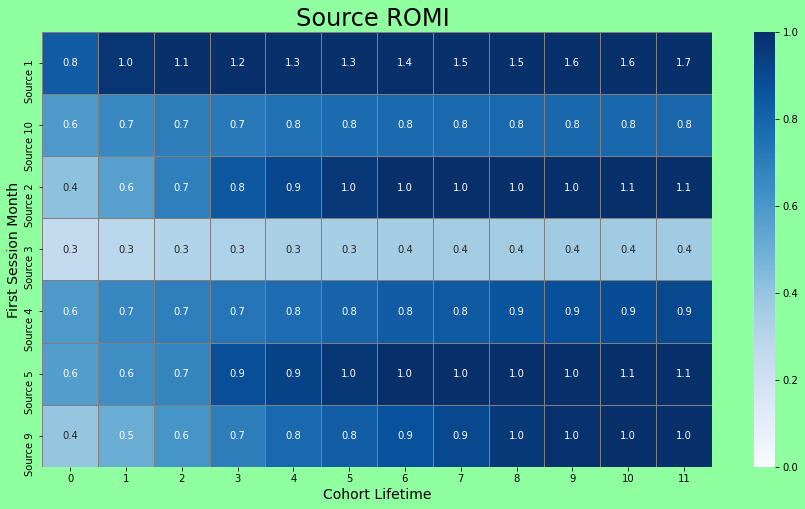

In [113]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Source ROMI ', fontsize=24)
    
sns.heatmap(source_lifetime_pivot_table, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1,
            cmap = 'Blues' 
           )
ax.set_ylabel('First Session Month', fontsize=14)    
ax.set_xlabel('Cohort Lifetime', fontsize=14)

Conslusion: <br />
In the previous part, we found out that almost all cohorts do not return on investment in attracting customers. In this part, we learned that investments in Sources 10, 3, and 4 must be urgently stopped since the cost of attracting is more than the profit coming from clients. Source 9 is on the verge of recoupment, and if we do not figure out how to increase LTV or reduce CAC, then this source should also be abandoned. The most attractive is Source 1 and if there is an opportunity to increase the number of clients from it, then you need to do it.

Source 3 spends the most money on attracting clients, but these investments do not bring profit. The overall picture does not appear to be financially successful and most cohorts are unprofitable. However, if not for the huge investment in Source 3, then most of the cohorts would be profitable. We simulate the situation without Source 3.

<div class="alert alert-success" role="alert">
Numbers a correct and the style is majestic =) 
</div>

##### 2.3.3.3 Forecast<a name="forecast"></a>

In [114]:
# calculating the number of unique users in each cohort every month
cohorts_ltv_forecast = (
    orders_all.
    query('source_id != 3 & actual_date != "2018-06-01"').
    groupby(['first_day_of_month_first_session','cohort_lifetime']).
    agg({'revenue':['sum','count']}).
    reset_index().reset_index()
)
cohorts_ltv_forecast.columns = ['index',
                                'first_day_of_month_first_session',
                                'cohort_lifetime',
                                'revenue',
                                'count_orders']
# counting the number of clients in each cohort
cohorts_ltv_0_forecast = (
    orders_all.
    query('source_id != 3').
    groupby('first_day_of_month_first_session').
    agg({'uid':'nunique'}).reset_index()
)
cohorts_ltv_0_forecast = cohorts_ltv_0_forecast.rename(columns = {'uid':'count_orders_all'})
cohorts_ltv_forecast = ( 
    cohorts_ltv_forecast.
    merge(cohorts_ltv_0_forecast, on = 'first_day_of_month_first_session')
)

In [115]:
# Let's calculate the total amount of purchases in each cohort
cohorts_cumsum_forecast = ( 
    cohorts_ltv_forecast.
    groupby('first_day_of_month_first_session').
    agg({'revenue':'cumsum'}).
    reset_index()
)
cohorts_cumsum_forecast = cohorts_cumsum_forecast.rename(columns = {'revenue':'revenue_all'})
cohorts_ltv_forecast = cohorts_ltv_forecast.merge(cohorts_cumsum_forecast, on = 'index')
cohorts_ltv_forecast['revenue_per_user'] = ( 
    cohorts_ltv_forecast['revenue_all']
    /
    cohorts_ltv_forecast['count_orders_all']
)
cohorts_ltv_forecast = cohorts_ltv_forecast[cohorts_ltv_forecast['first_day_of_month_first_session'] != '2018-06-01']
cohorts_ltv_forecast['first_day_of_month_first_session_str'] = ( 
    cohorts_ltv_forecast['first_day_of_month_first_session'].dt.strftime('%Y.%m')
)


In [116]:
costs_month_forecast = (
    costs.
    query('source_id != 3').
    groupby('first_day_of_month_first_session').
    agg({'costs':'sum'}).reset_index()
)

In [117]:
cohorts_romi_forecast = (
    cohorts_ltv_forecast.
    merge(costs_month_forecast[['first_day_of_month_first_session','costs']],
          on = 'first_day_of_month_first_session')
)
cohorts_romi_forecast['romi'] = cohorts_romi_forecast['revenue_all'] / cohorts_romi_forecast['costs']

In [118]:
# Let's create a pivot table with ROMI information for each cohort
cohorts_romi_pivot_table_forecast = ( 
    cohorts_romi_forecast.
    pivot_table(index = 'first_day_of_month_first_session_str',
                columns = 'cohort_lifetime',
                values = 'romi',
                aggfunc = 'sum')
)

Text(0.5, 51.0, 'Cohort Lifetime')

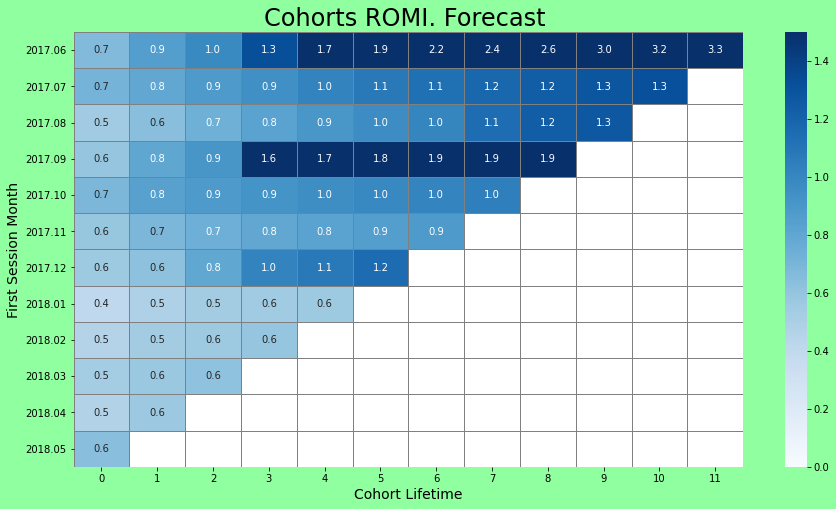

In [119]:
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Cohorts ROMI. Forecast ', fontsize=24)
    
sns.heatmap(cohorts_romi_pivot_table_forecast, 
            annot= True,
            fmt = '.1f',
            linewidths = 1,
            linecolor = 'grey',
            vmin = 0,
            vmax = 1.5,
            cmap = 'Blues' 
           )
ax.set_ylabel('First Session Month', fontsize=14)    
ax.set_xlabel('Cohort Lifetime', fontsize=14)

Conclusion: <br />
As we can see, without the costs and sales with **Source 3**, the business model looks quite attractive. In 4-5 months, all cohorts recoup the investment and start making a profit.

<div class="alert alert-success" role="alert">
Oh wow... I don't think I've seen anything like that from other students. I'm impressed! 
</div>

In [120]:
romi_monthly_forecast = cohorts_romi_pivot_table_forecast.mean(axis=0).reset_index() 
romi_monthly_forecast

,cohort_lifetime,0
0,0,0.57
1,1,0.68
2,2,0.77
3,3,0.96
4,4,1.09
5,5,1.25
6,6,1.35
7,7,1.54
8,8,1.75
9,9,1.84


### Step 3. Overall conclusion <a name="overall_conclusion"></a>

<h4>Pivot Table:</h4>

<table style="width:95%">
  <tr>
      <th>Source</th>
      <th>ROMI</th> 
      <th>LTV, USD</th>
      <th>CAC, USD</th>
      <th>Orders,%</th>
      <th>Costs,%</th>
      <th>Revenue,%</th>
      <th width=10%>Conversion, days</th>
      <th width=30%>Conclusion</th>      
  </tr>
  <tr>
      <td>№ 1</td>
      <td><b><font color="green">1.7</font></b></td>
      <td>10.34</td>
      <td>6.19</td>
      <td>11.52</td>
      <td>6.33</td>
      <td>13.81</td>
      <td>9</td>
      <td>The most promising channel with excellent ROMI and Conversion. We need to work on increasing the number of clients from this resource.</td>
  </tr>
  <tr>
      <td>№ 2</td>
      <td><b><font color="green">1.1</font></b></td>
      <td>12.74</td>
      <td>12.03</td>
      <td>12.51</td>
      <td>13.01</td>
      <td>17.99</td>
      <td>20</td>
      <td>A good channel with good indicators. We need to work on increasing LTV and reducing CAC. </td>
  </tr>
  <tr>  
      <td>№ 3</td>
      <td><b><font color="red">0.4</font></b></td>
      <td>5.12</td>
      <td>13.94</td>
      <td>25.42</td>
      <td><b><font color="red">42.94</font></b></td>
      <td>20.61</td>
      <td>18</td>
      <td>The resource with the worst indicators. We need to urgently stop investment in this Source. And to figure out what is the reason for such high costs and such small sales.</td>
  </tr>
  <tr>
      <td>№ 4</td>
      <td><b><font color="red">0.9</font></b></td>
      <td>5.53</td>
      <td>6.1</td>
      <td>24.82</td>
      <td>18.56</td>
      <td>21.97</td>
      <td>16</td>
      <td>The resource is unprofitable. We need to increase LTV and lower CAC. If this fails, we need to stop investing in this source.</td>
  </tr>
  <tr>
      <td>№ 5</td>
      <td><b><font color="green">1.1</font></b></td>
      <td>7.65</td>
      <td>7.28</td>
      <td>19.48</td>
      <td>15.73</td>
      <td>21.60</td>
      <td>13</td>
      <td>A good channel with good indicators. We need to work on increasing LTV and lowering CAC.</td>
  </tr>
  <tr>
      <td>№ 9</td>
      <td>1.0</td>
      <td>5.25</td>
      <td>5.23</td>
      <td>3.15</td>
      <td>1.68</td>
      <td>2.20</td>
      <td>45</td>
      <td>The resource is balancing on the brink of payback. His share of orders is small. We need to increase LTV and lower CAC to make it more attractive to our business.</td>
  </tr>
    <tr>
      <td>№ 10</td>
      <td><b><font color="red">0.8</font></b></td>
      <td>3.53</td>
      <td>4.47</td>
      <td>3.09</td>
      <td>1.77</td>
      <td>1.82</td>
      <td>12</td>
      <td>The resource is unprofitable. The share of orders from it is small. We need to increase LTV and lower CAC. If that fails, we need to stop investing in this source.</td>
  </tr>

</table>

</body>
</html>

<div class="alert alert-success" role="alert">
Bravo!
</div>

Conclusion:<br /><br />
The current business model generates new losses for us every day, we urgently need to make adjustments. The most important adjustment is the rejection of Sources 3, 4, 10. Source 3 is hopelessly unprofitable. If we come up with a mechanism to improve LVT and reduce CAC for sources 4 and 10, we can try to work with them again. You need to be prepared for a drop in revenue because Sources 3 and 4 account for 50% of sales in total.<br /><br />
When the calculation of profitability was made, excluding data from Source 3, and it turned out that all cohorts will return investments in 4-5 months. This is a good result.<br /><br />
The most attractive are investments in Source 1. If possible, you need to increase the flow of clients from this Source.<br /><br />

More than 80% of customers use a PC. 68% make their first order on the same day as their first visit to our site. More than 13% of customers make their first order later than 30 days after the first visit. 22% of customers place more than one order. This is a fairly low customer retention rate, it means that customers after the first interaction experience further choose other companies.